In [1]:
from math import pi
import time
import torch
from tqdm import tqdm
from torch.autograd import Variable
from torch.autograd import grad as torch_grad
from torch.utils.tensorboard import writer, SummaryWriter
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt

from train_compare import Trainer
from datasets.datasets import *
from models.wgangp import Generator, Critic

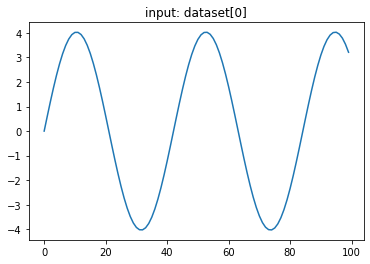

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

CUDA Device used:  cuda
Training is about to start...
data (200, 100)


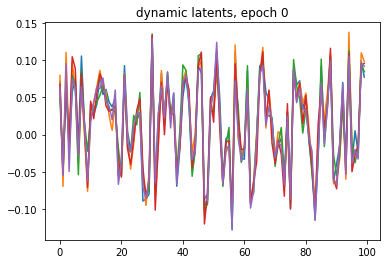

  2%|█▉                                                                          | 250/10000 [02:27<1:35:18,  1.71it/s]

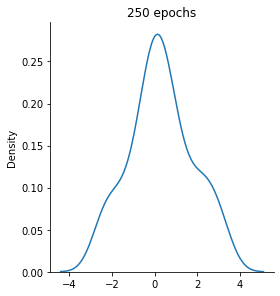

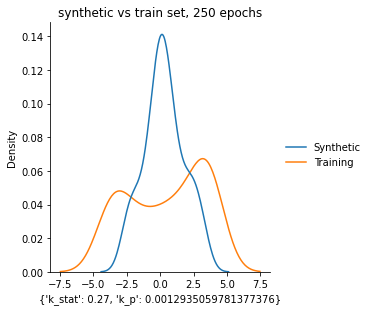

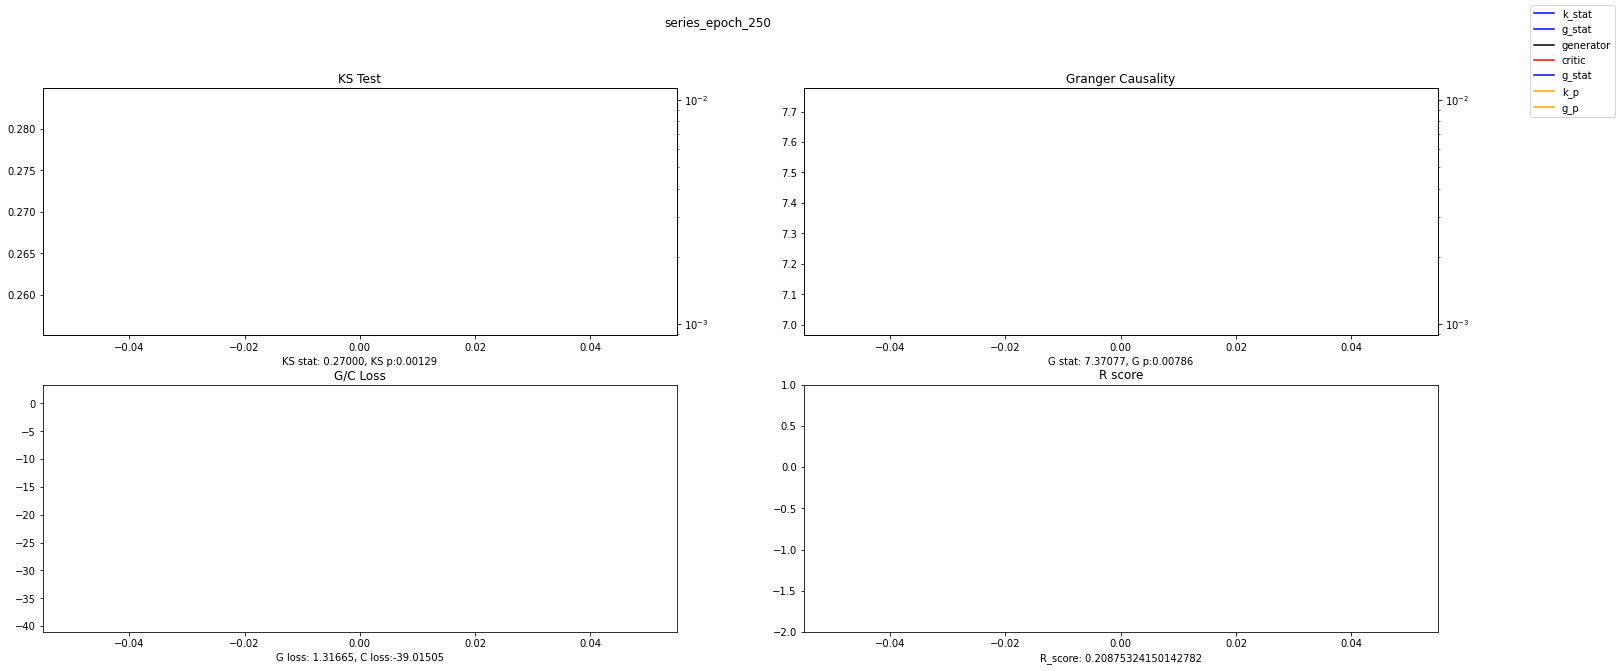

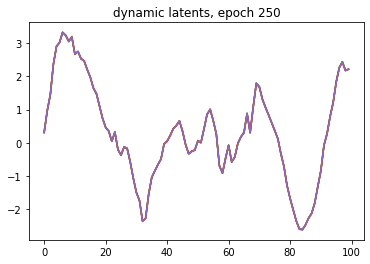

  5%|███▊                                                                        | 500/10000 [04:53<1:28:38,  1.79it/s]

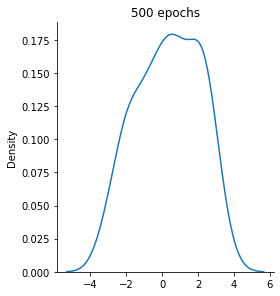

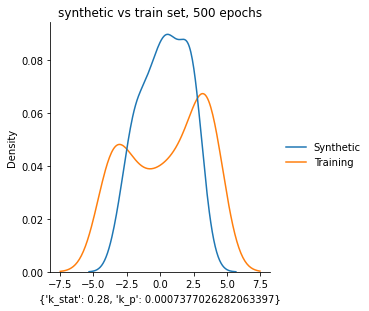

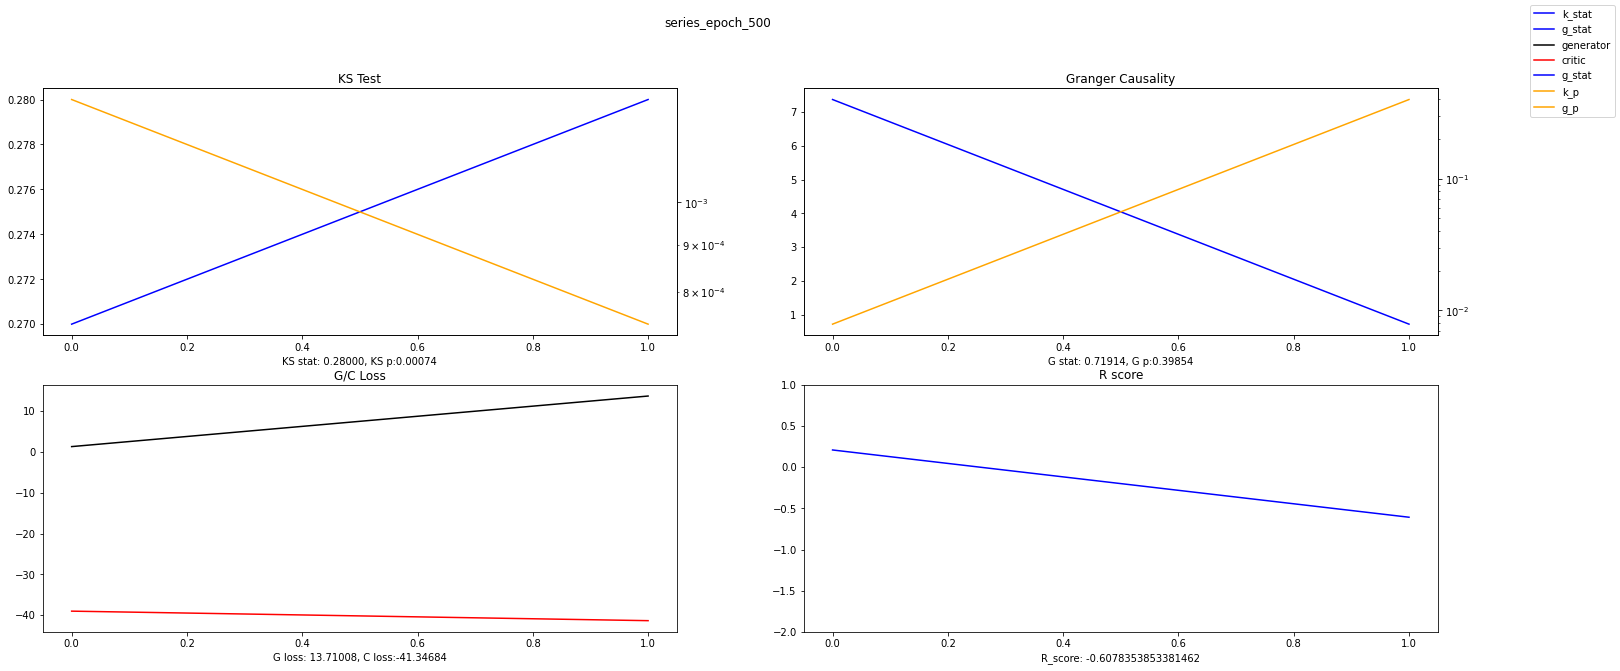

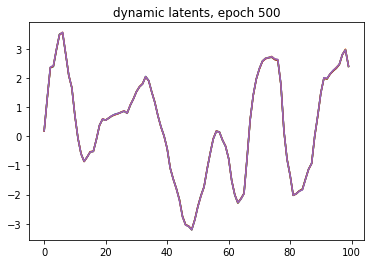

  8%|█████▋                                                                      | 750/10000 [07:18<1:29:06,  1.73it/s]

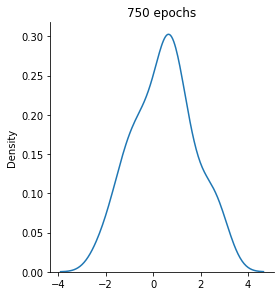

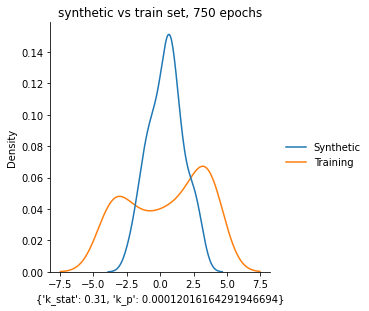

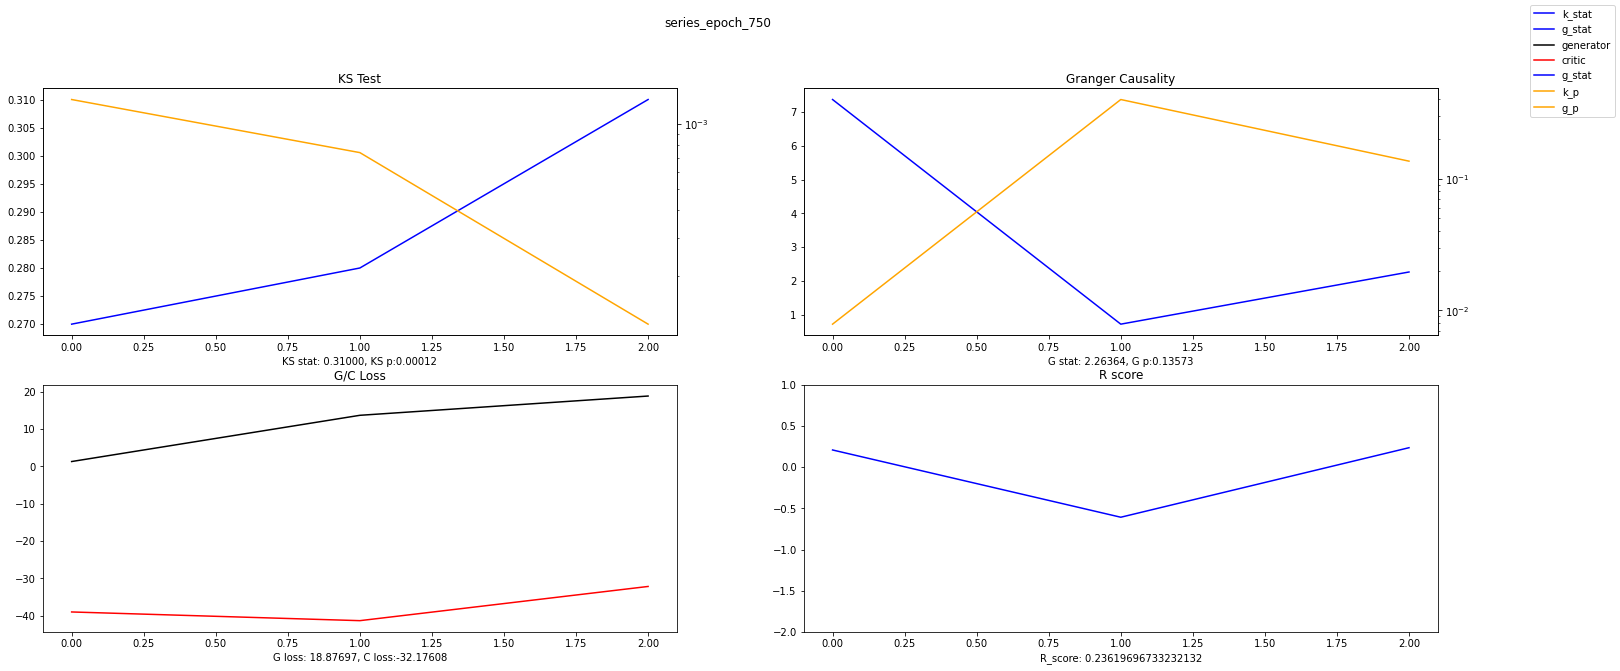

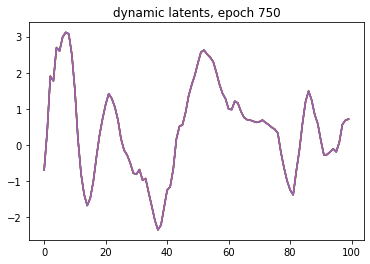

 10%|███████▌                                                                   | 1000/10000 [09:46<1:28:49,  1.69it/s]

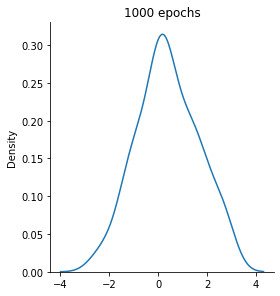

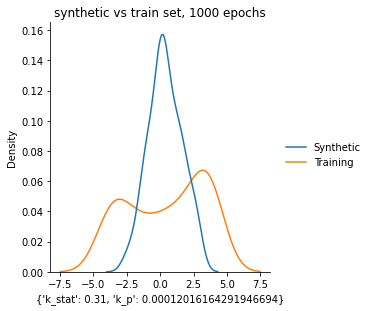

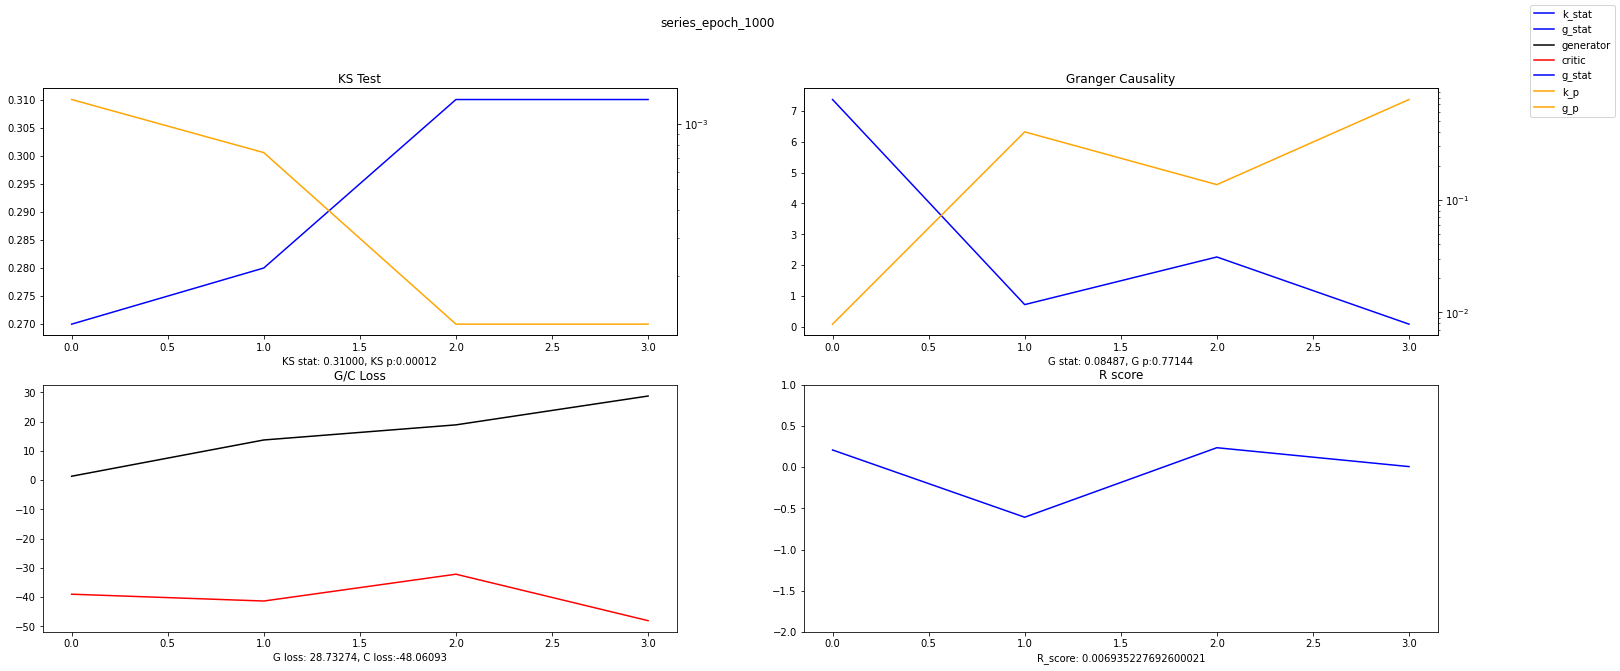

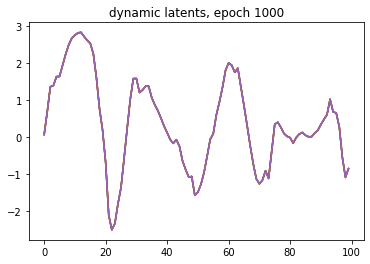

 12%|█████████▍                                                                 | 1250/10000 [12:15<1:26:10,  1.69it/s]

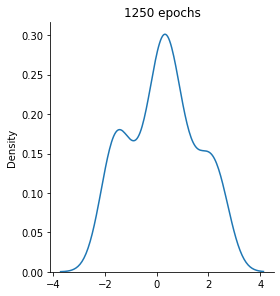

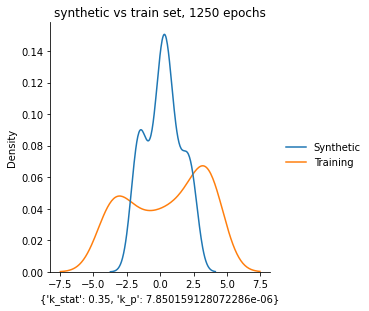

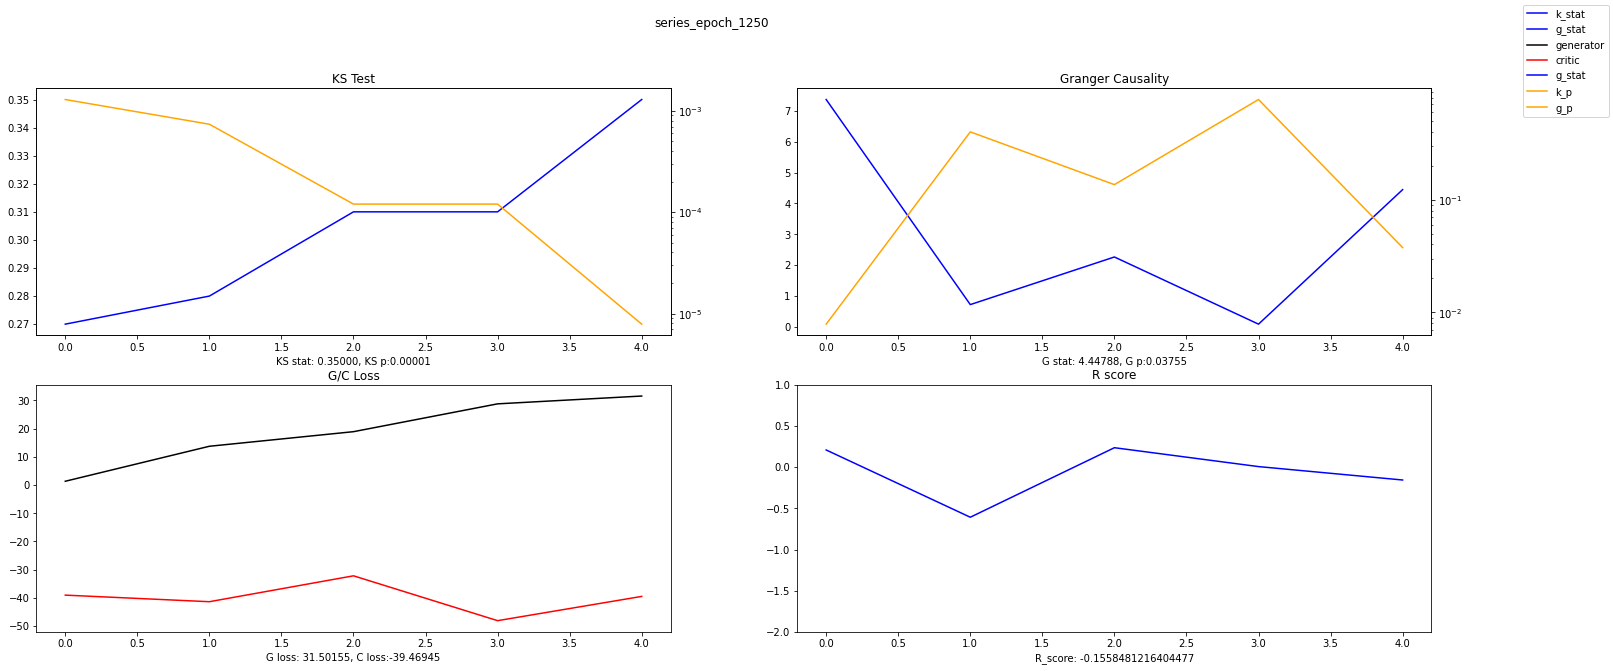

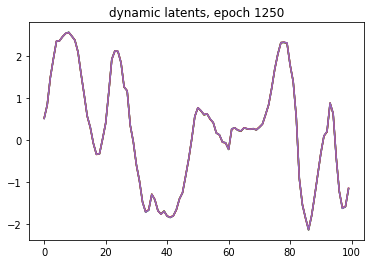

 15%|███████████▎                                                               | 1500/10000 [14:52<1:28:08,  1.61it/s]

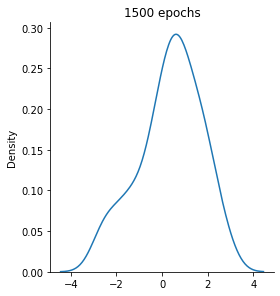

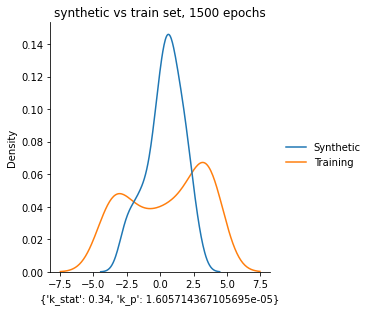

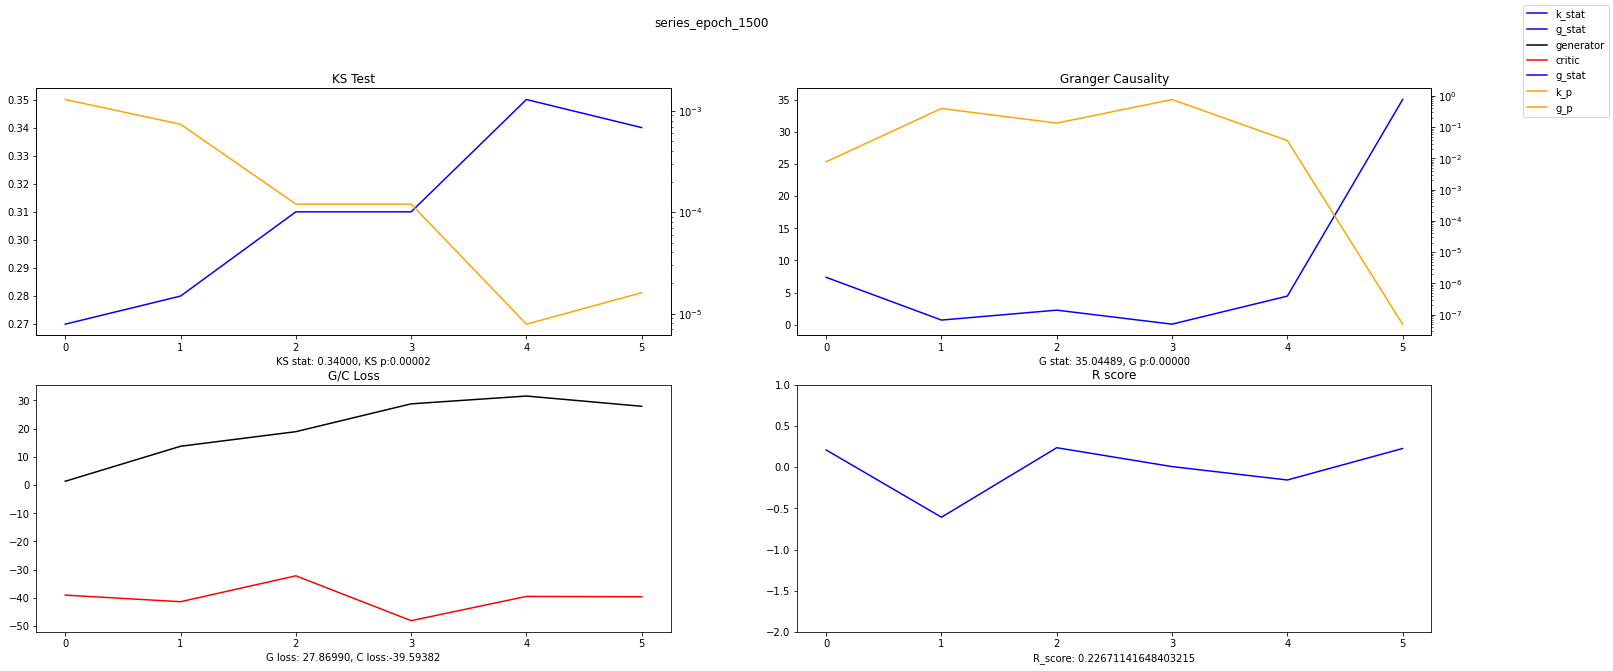

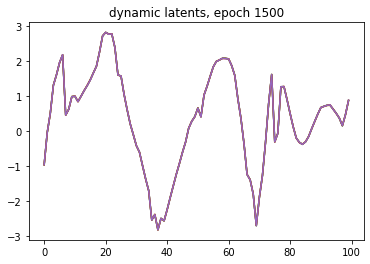

 18%|█████████████▏                                                             | 1750/10000 [17:29<1:23:25,  1.65it/s]

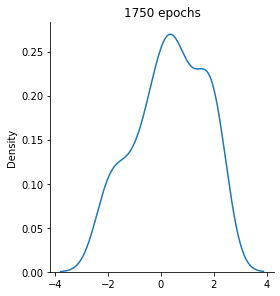

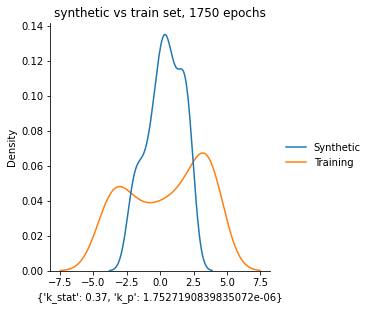

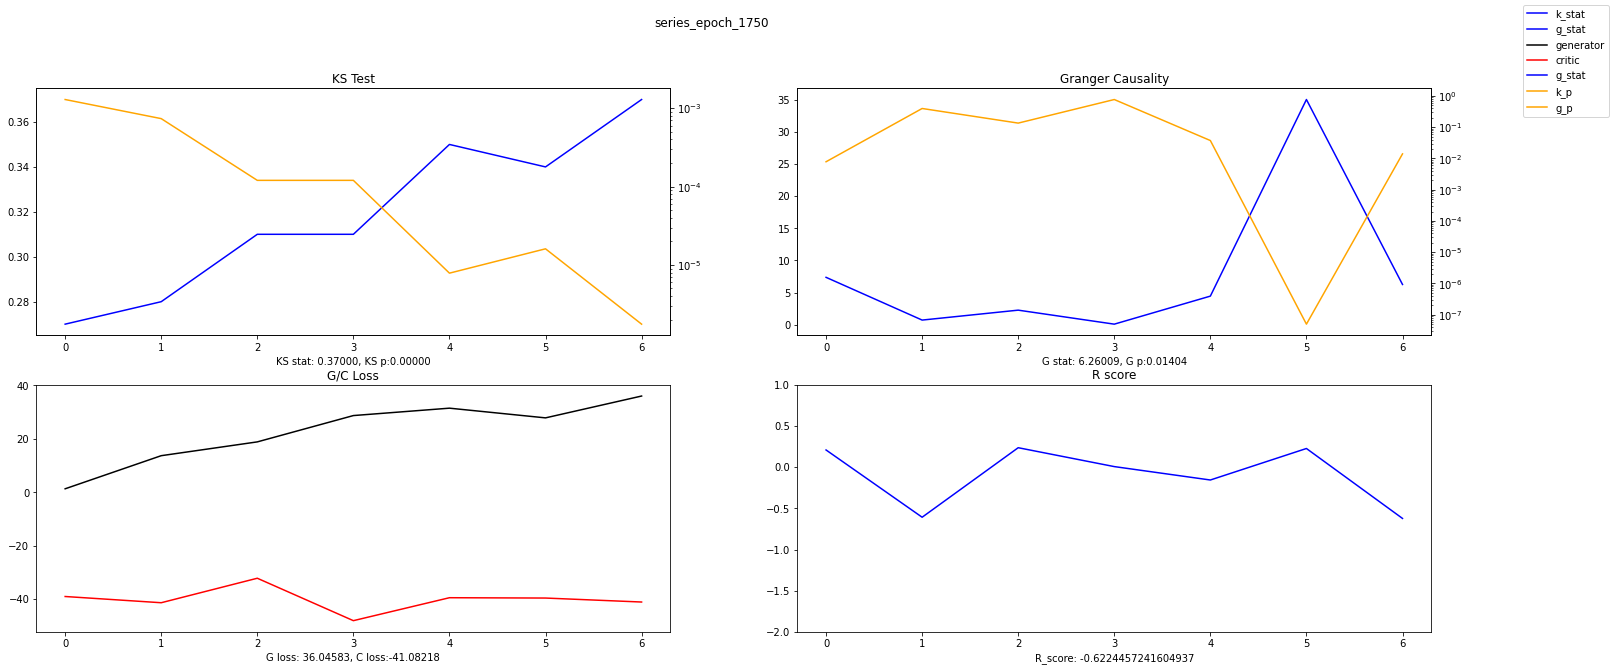

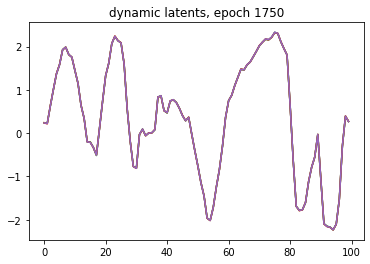

 20%|███████████████                                                            | 2000/10000 [20:06<1:22:24,  1.62it/s]

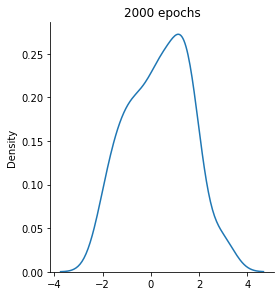

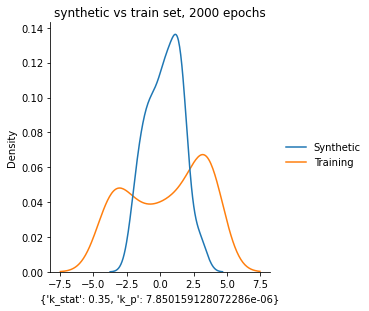

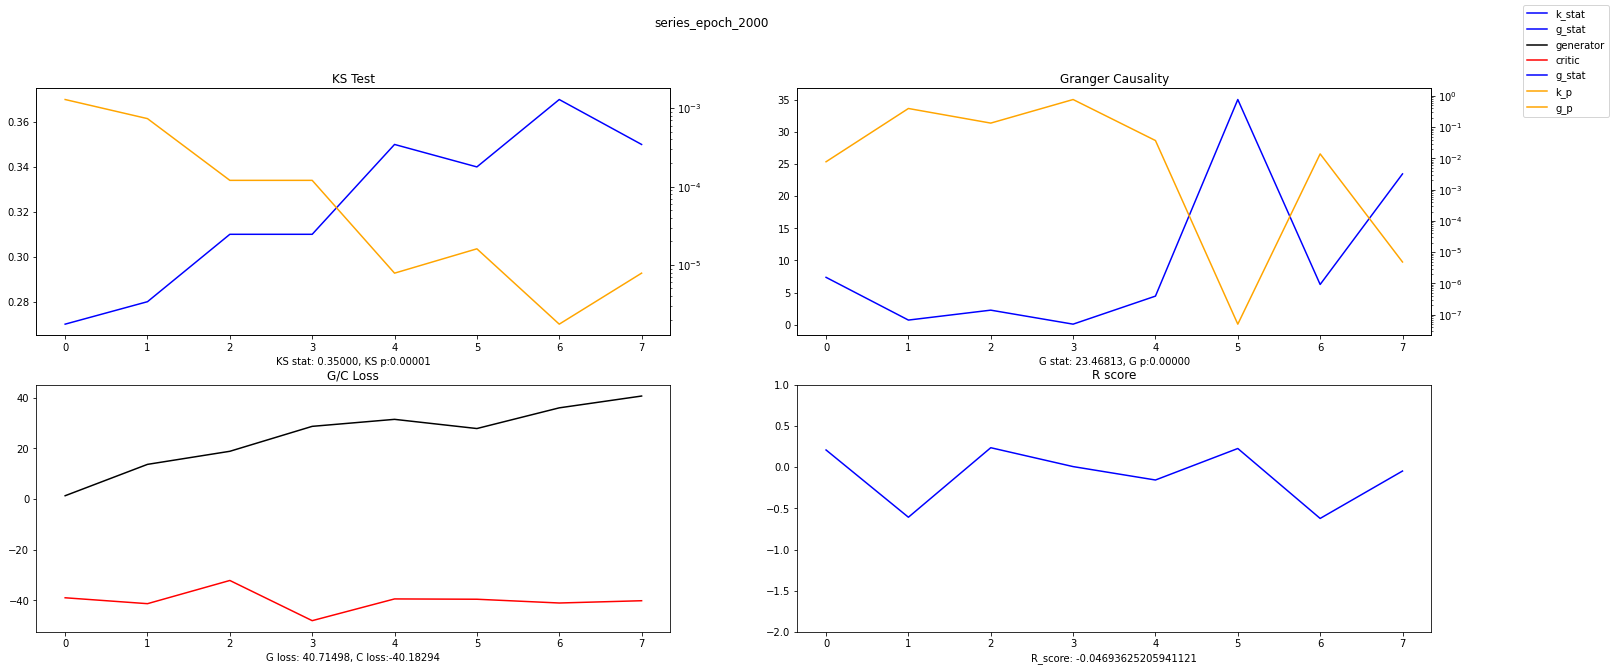

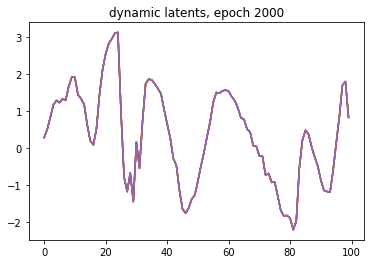

 22%|████████████████▉                                                          | 2250/10000 [22:43<1:21:07,  1.59it/s]

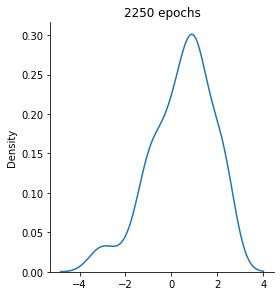

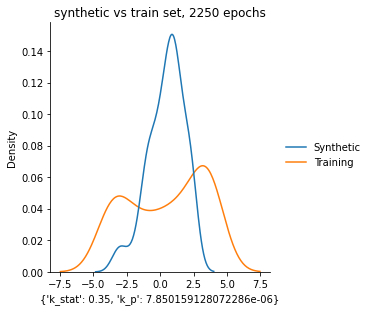

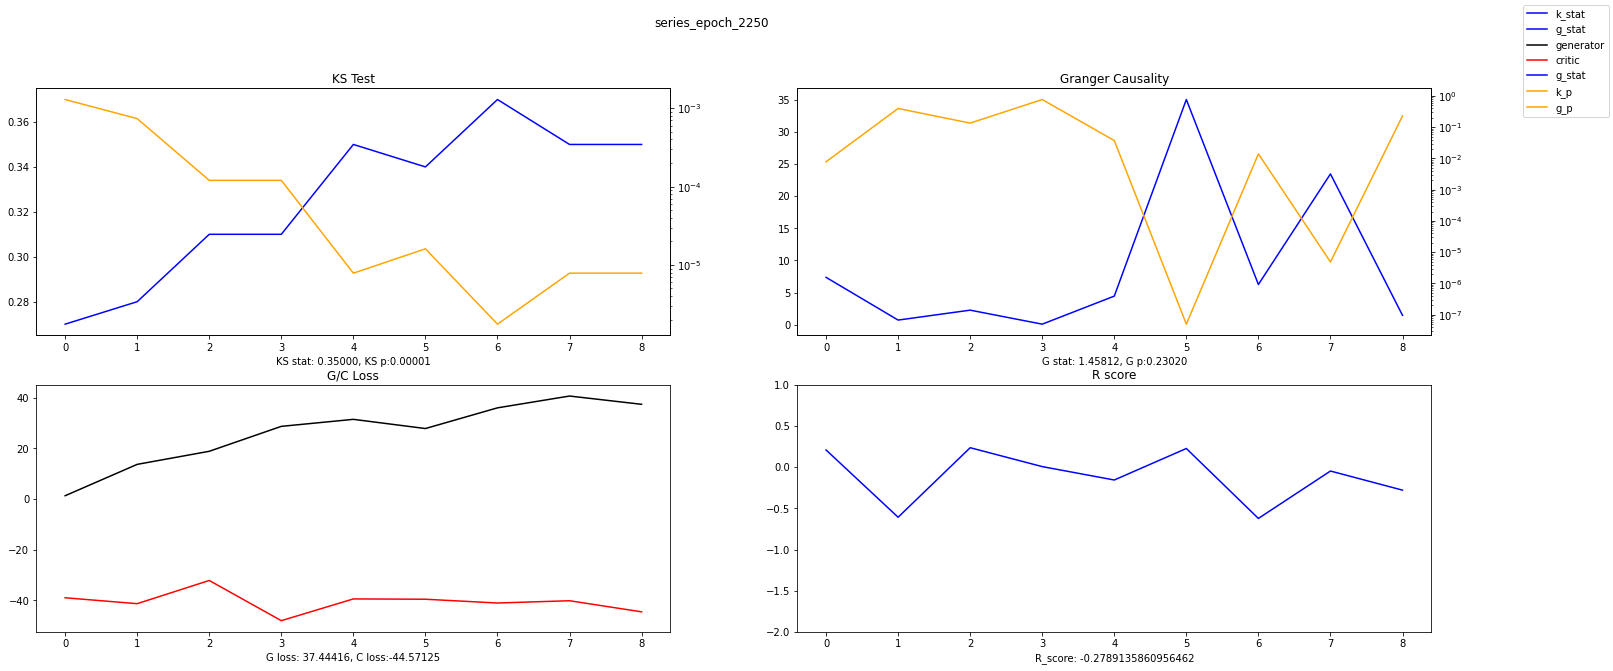

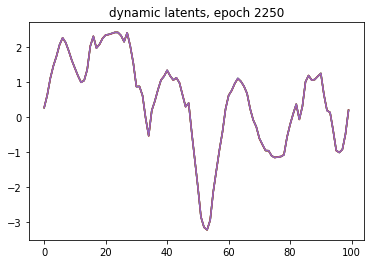

 25%|██████████████████▊                                                        | 2500/10000 [25:17<1:15:19,  1.66it/s]

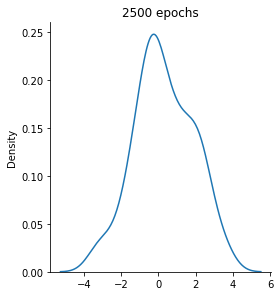

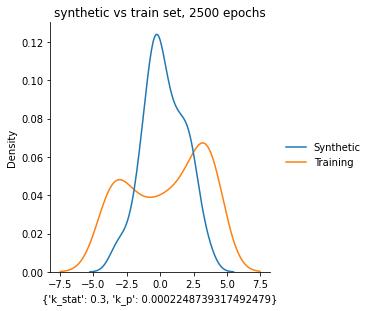

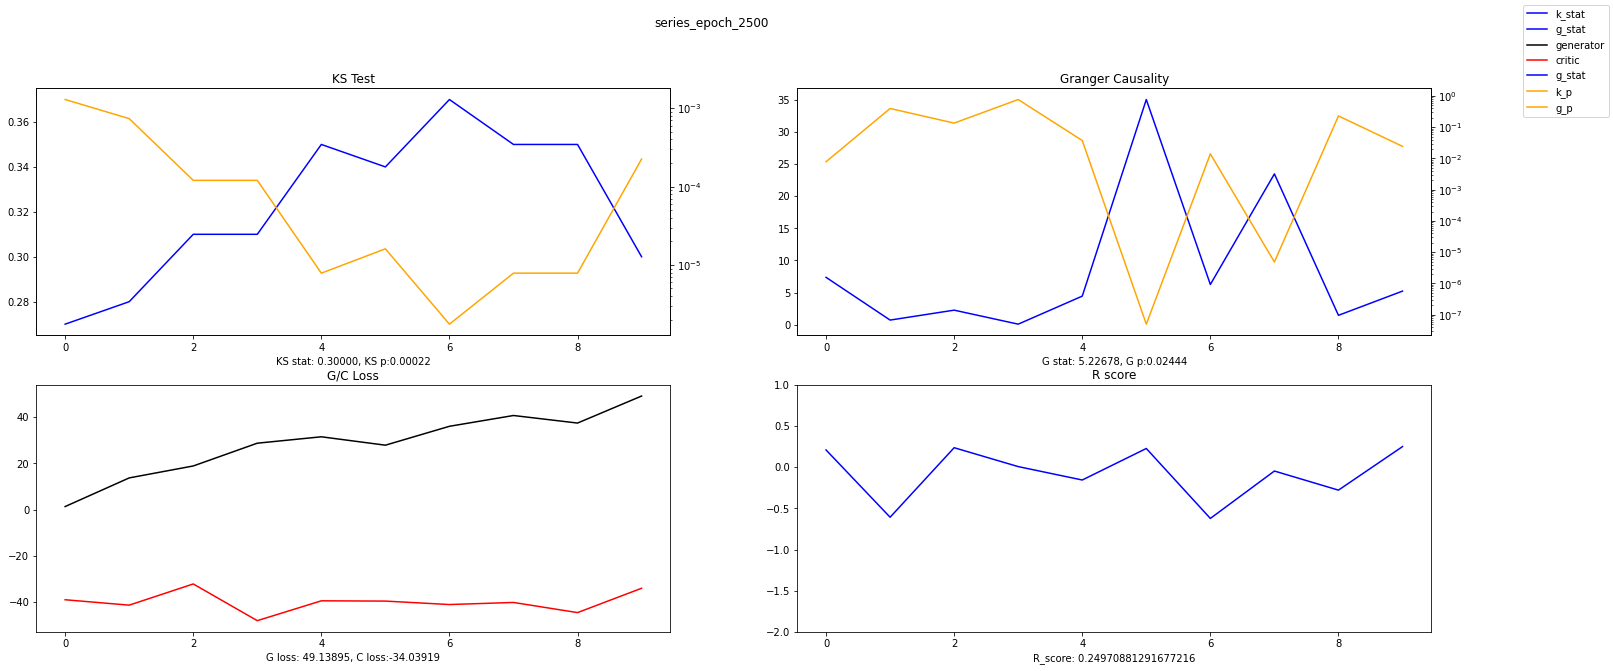

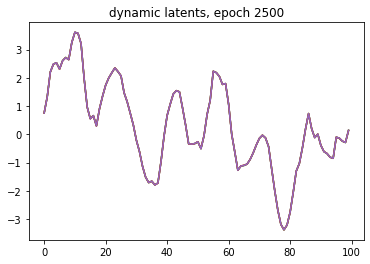

 28%|████████████████████▋                                                      | 2750/10000 [27:48<1:14:09,  1.63it/s]

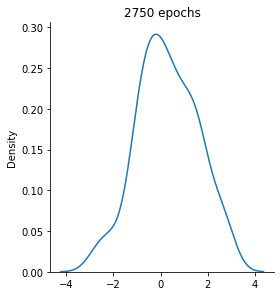

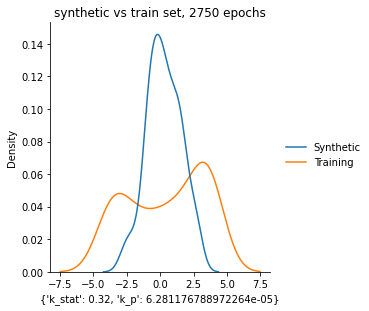

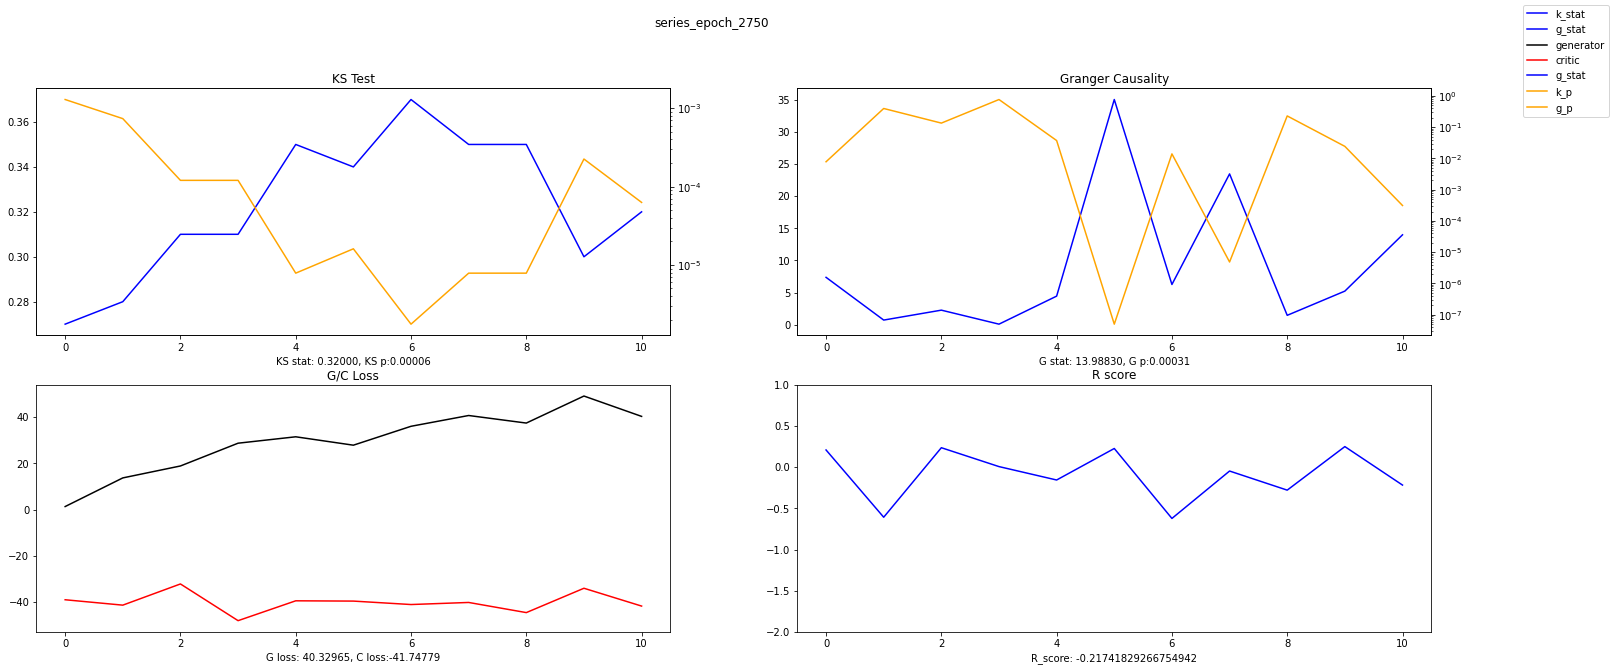

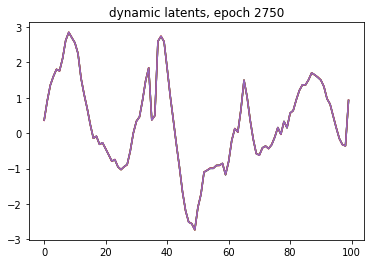

 30%|██████████████████████▌                                                    | 3000/10000 [30:24<1:11:25,  1.63it/s]

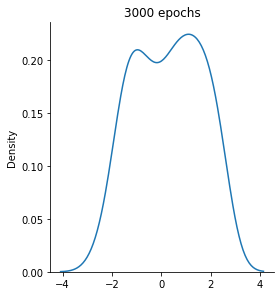

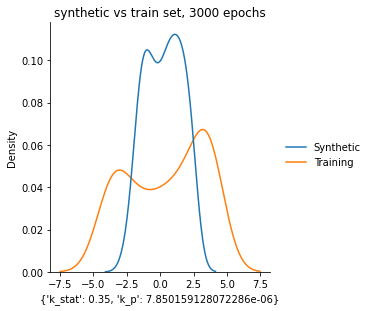

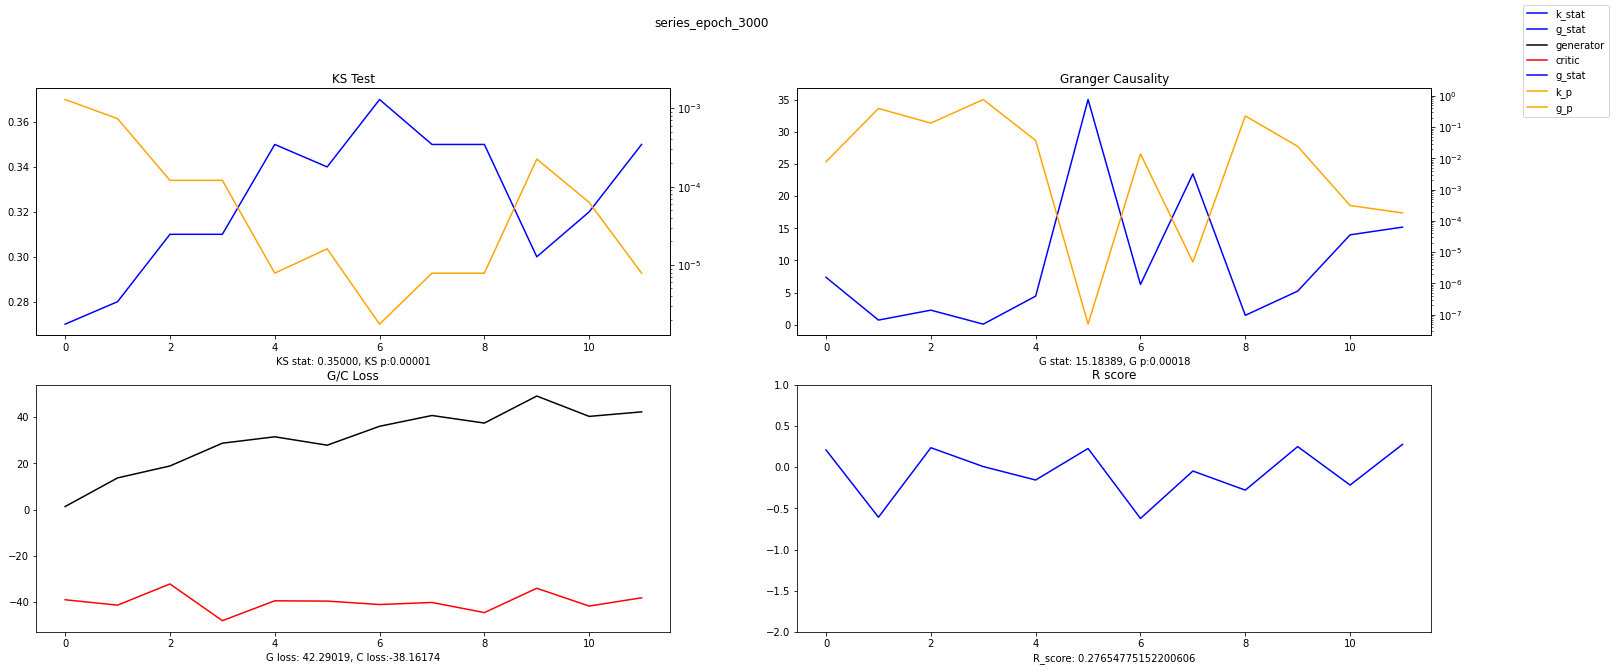

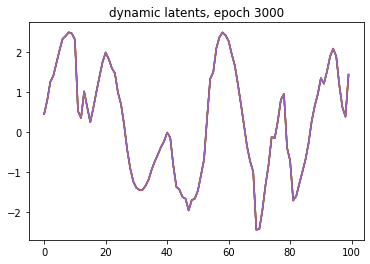

 32%|████████████████████████▍                                                  | 3250/10000 [33:03<1:09:03,  1.63it/s]

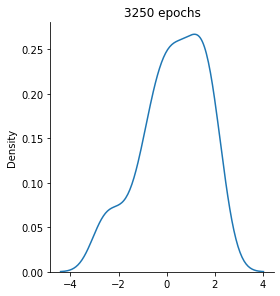

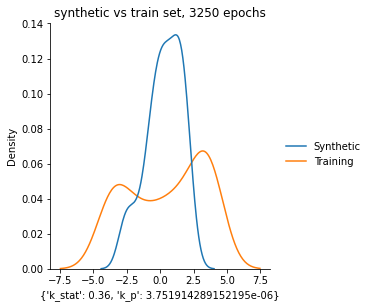

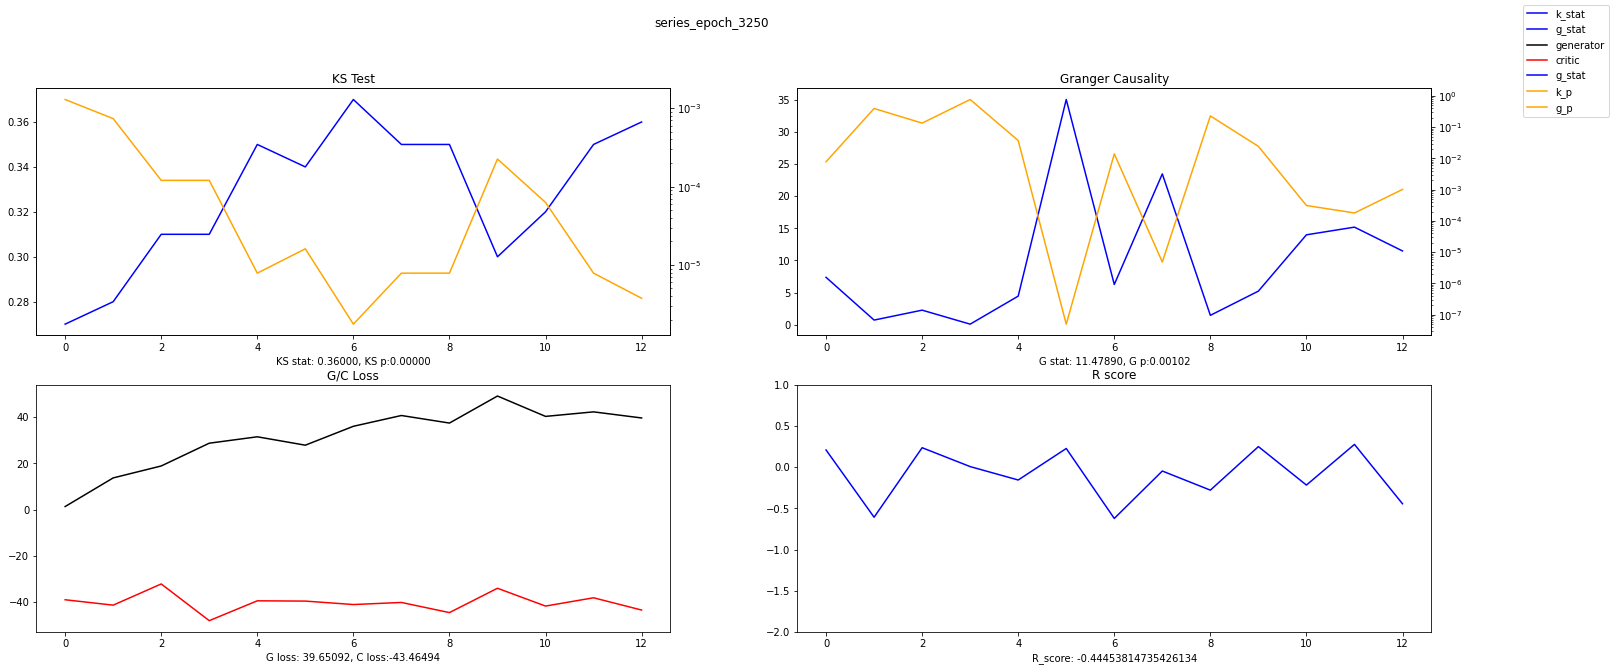

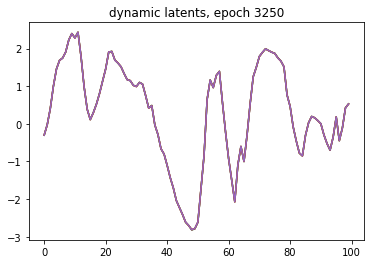

 35%|██████████████████████████▎                                                | 3500/10000 [35:43<1:11:26,  1.52it/s]

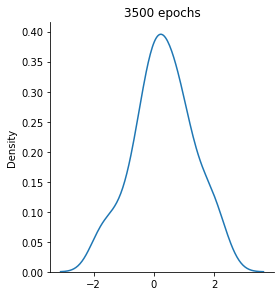

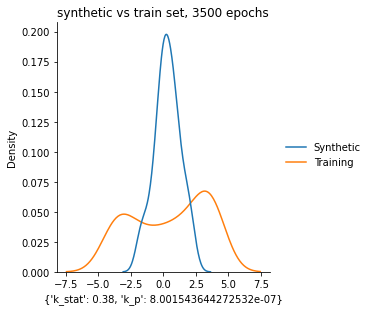

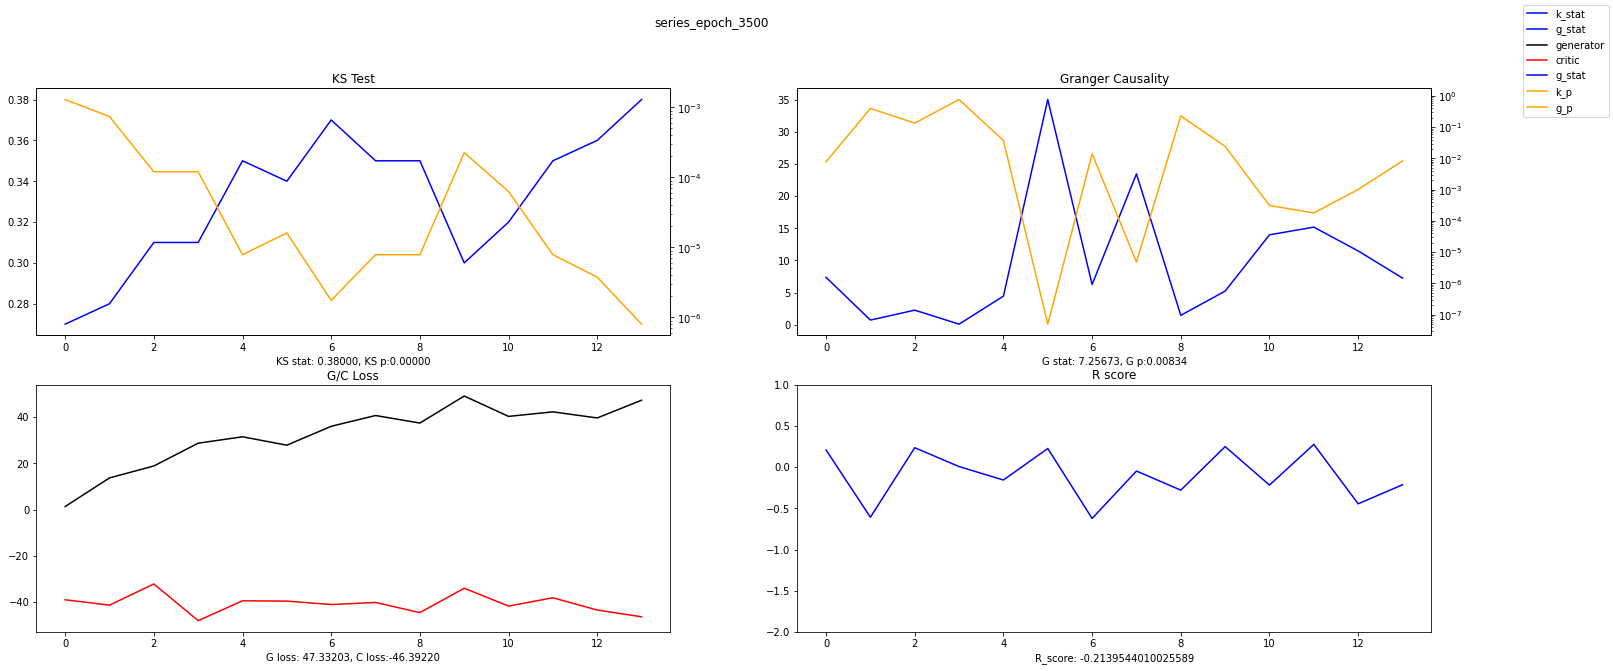

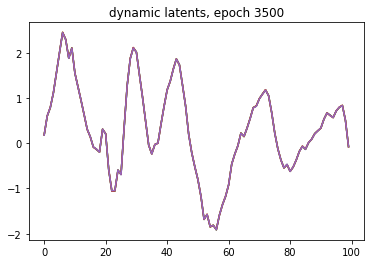

 38%|████████████████████████████▏                                              | 3750/10000 [38:25<1:05:29,  1.59it/s]

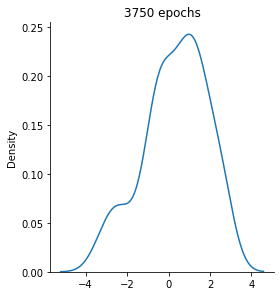

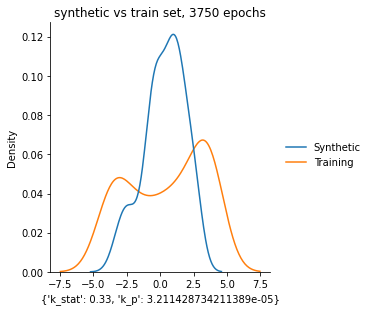

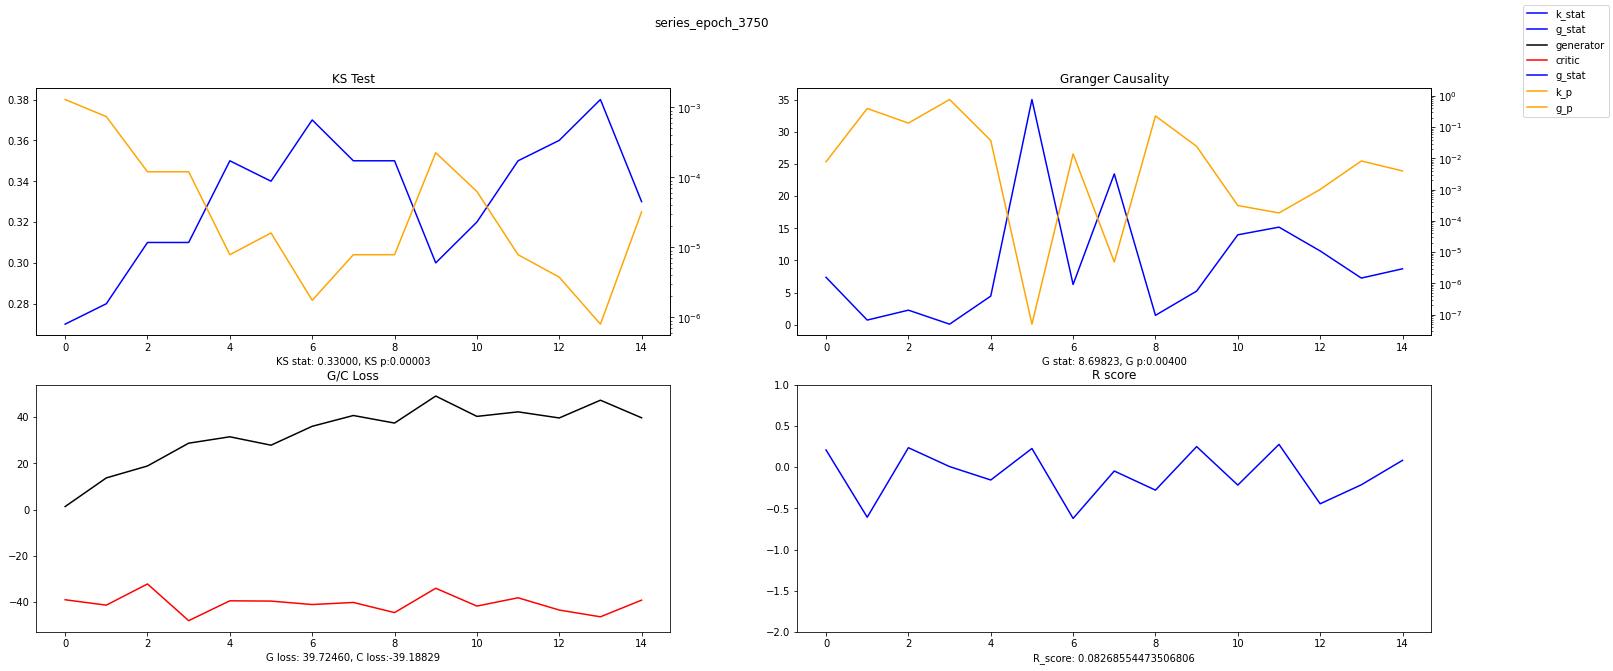

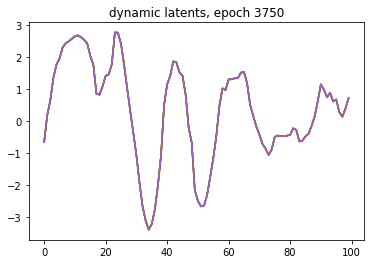

 40%|██████████████████████████████                                             | 4000/10000 [41:00<1:05:37,  1.52it/s]

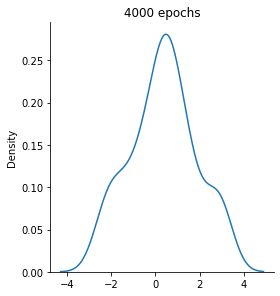

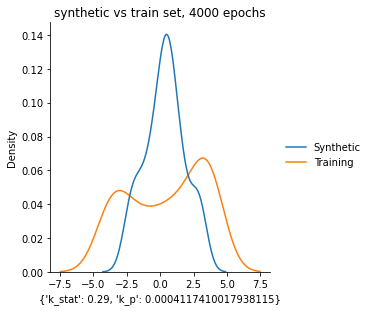

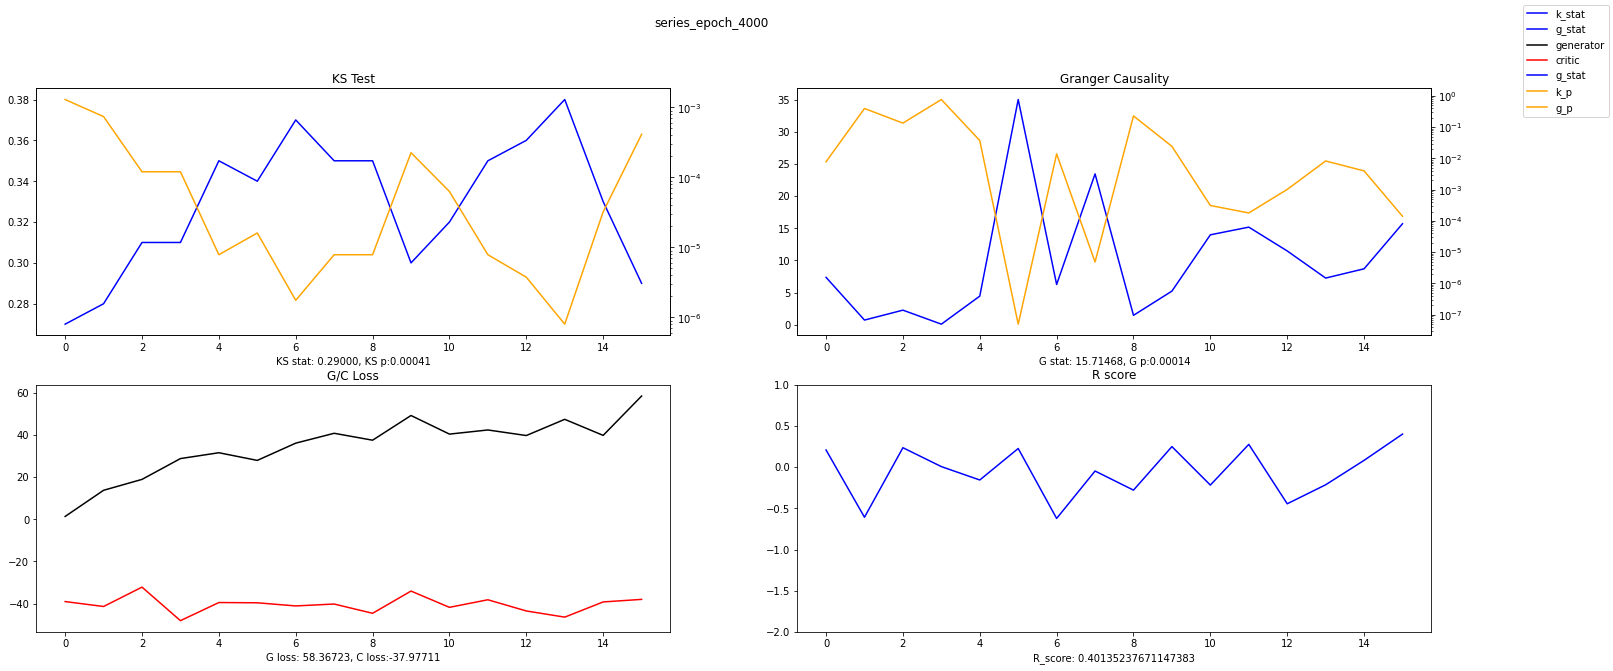

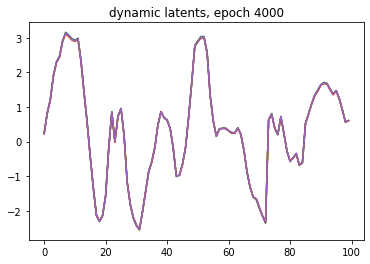

 42%|████████████████████████████████▋                                            | 4250/10000 [43:33<54:53,  1.75it/s]

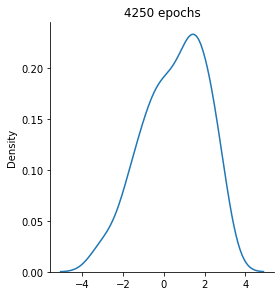

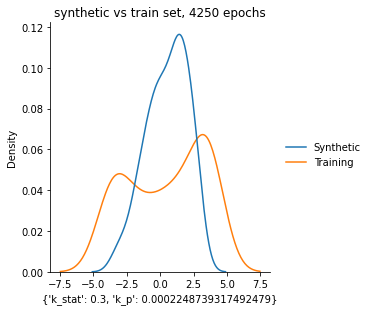

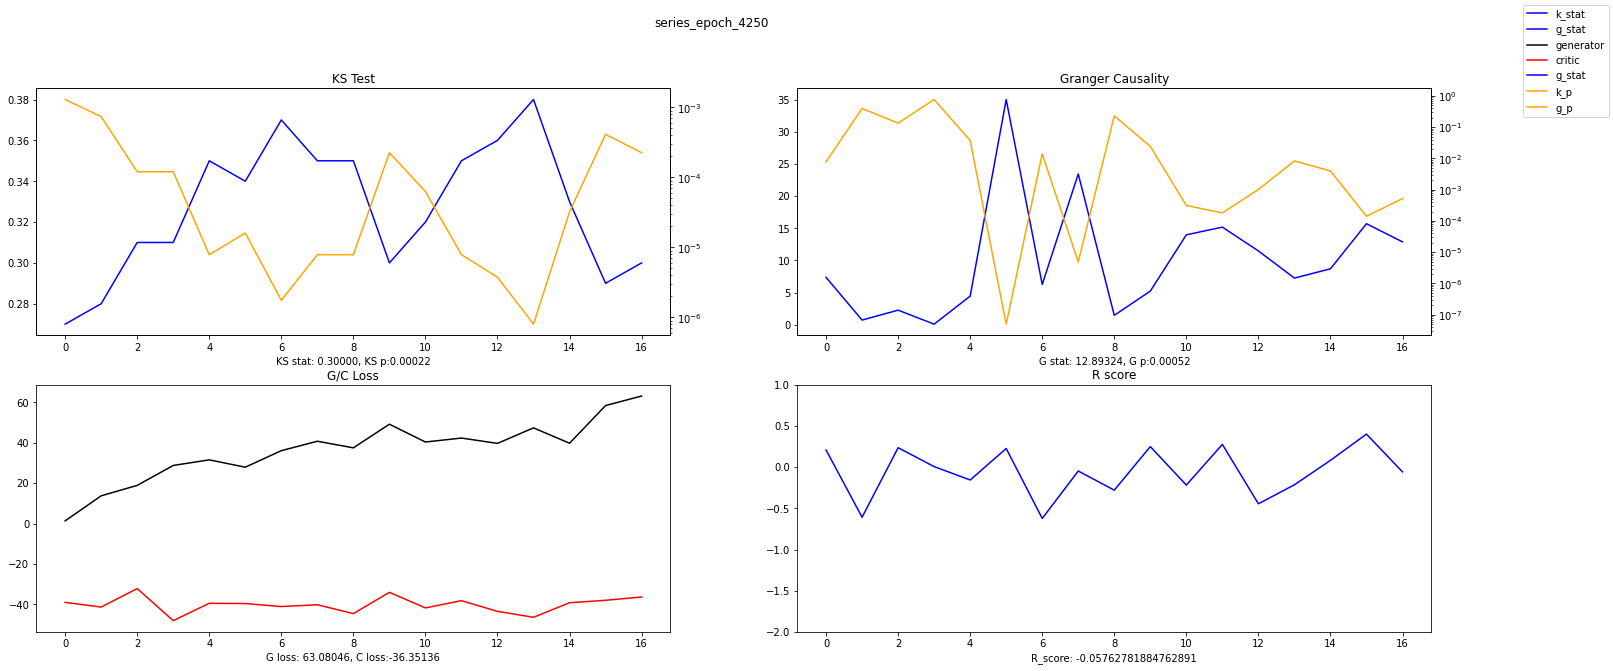

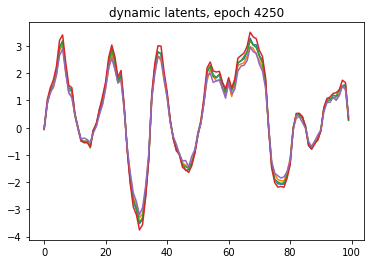

 45%|██████████████████████████████████▋                                          | 4500/10000 [45:58<51:18,  1.79it/s]

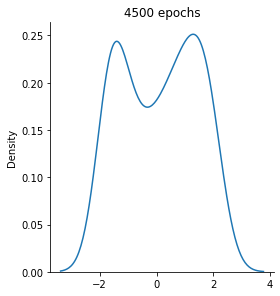

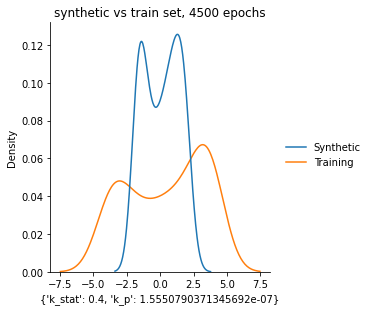

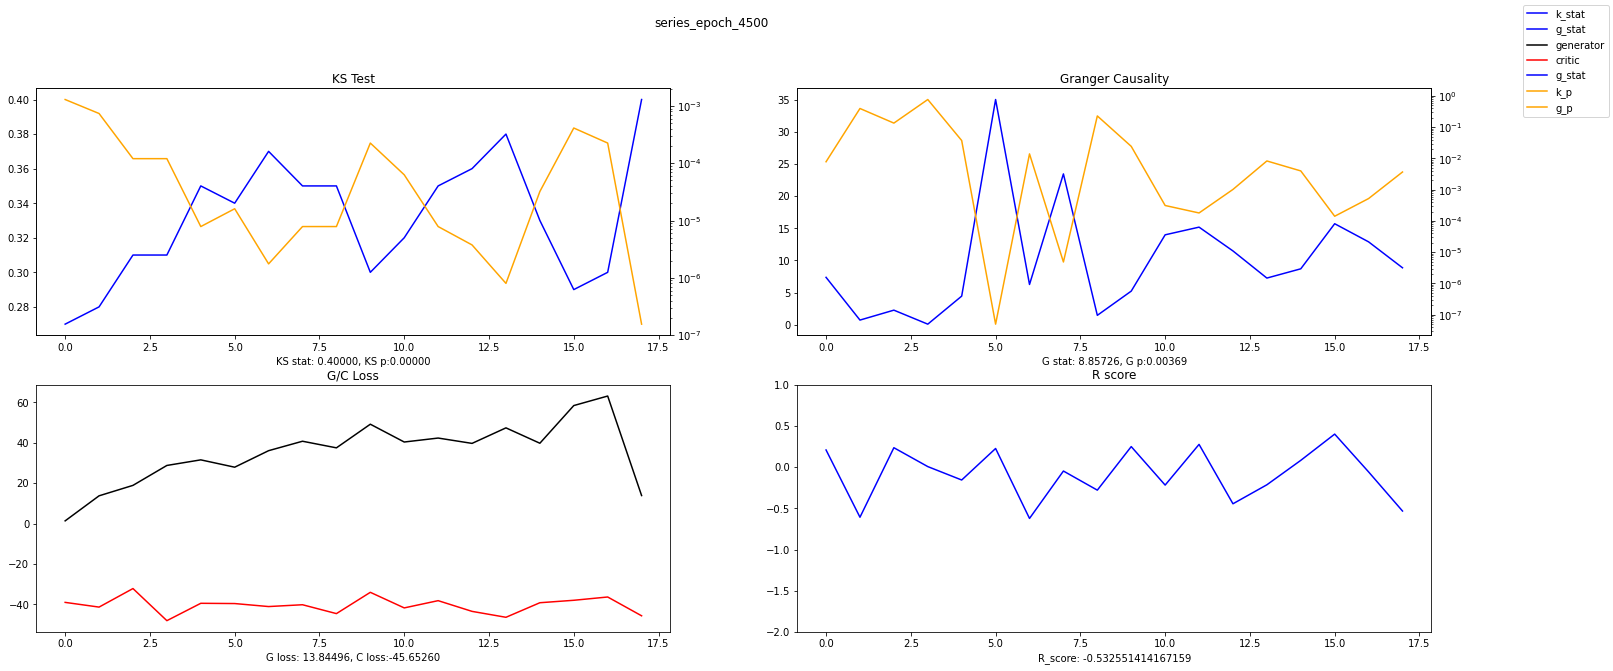

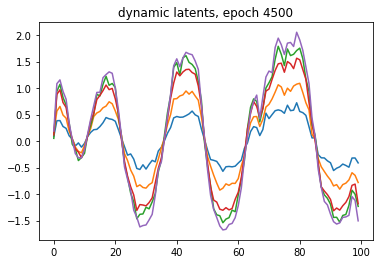

 48%|████████████████████████████████████▌                                        | 4750/10000 [48:23<50:02,  1.75it/s]

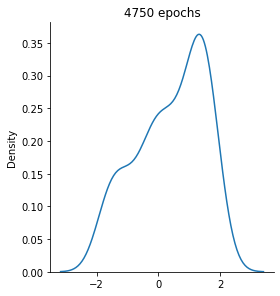

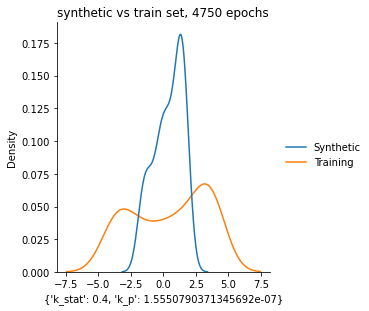

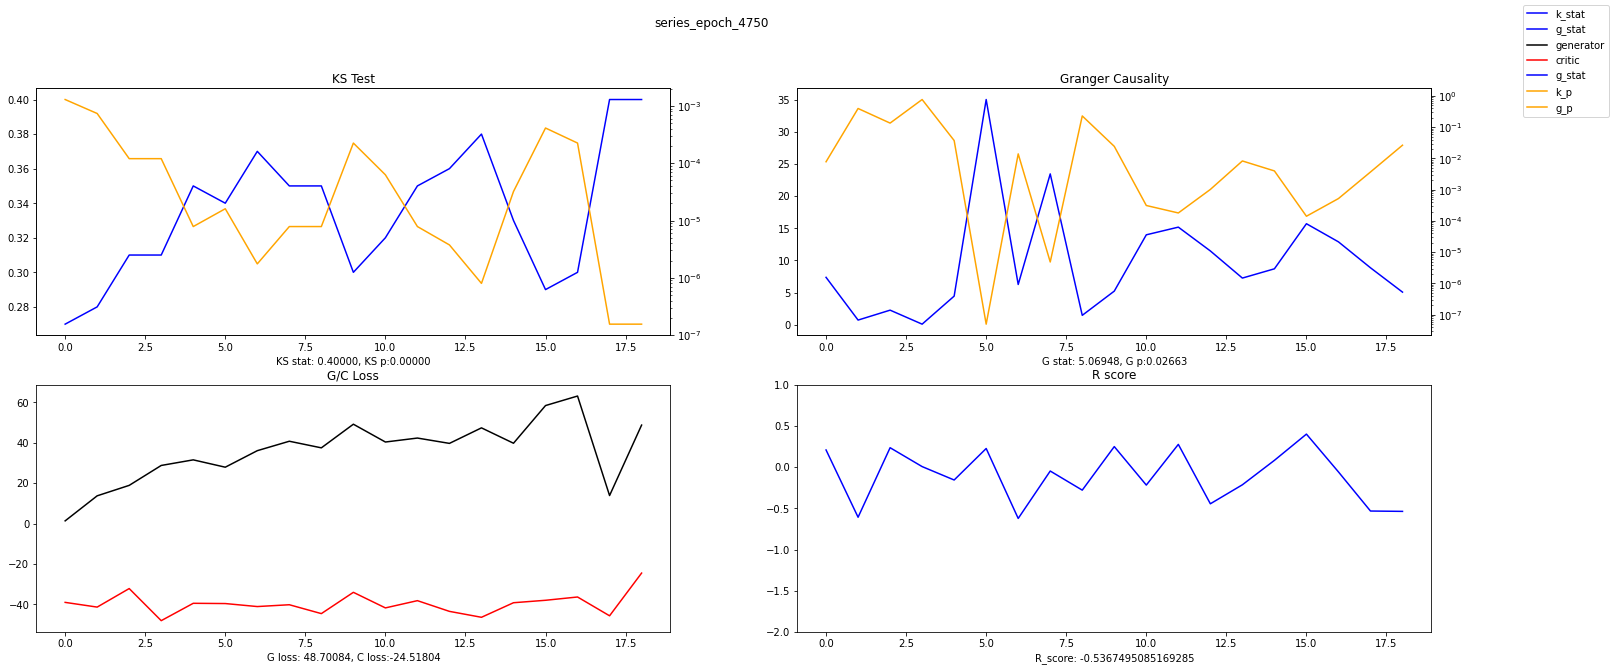

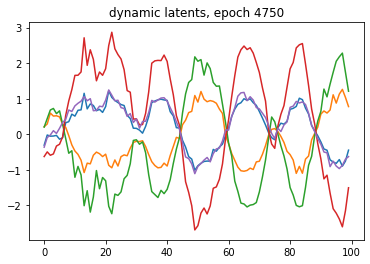

 50%|██████████████████████████████████████▌                                      | 5000/10000 [50:51<46:52,  1.78it/s]

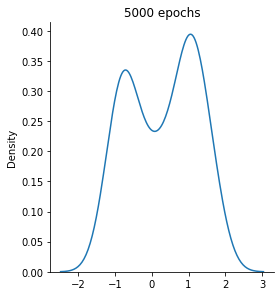

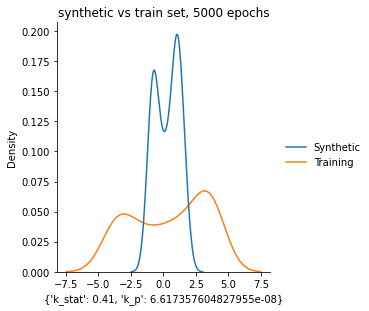

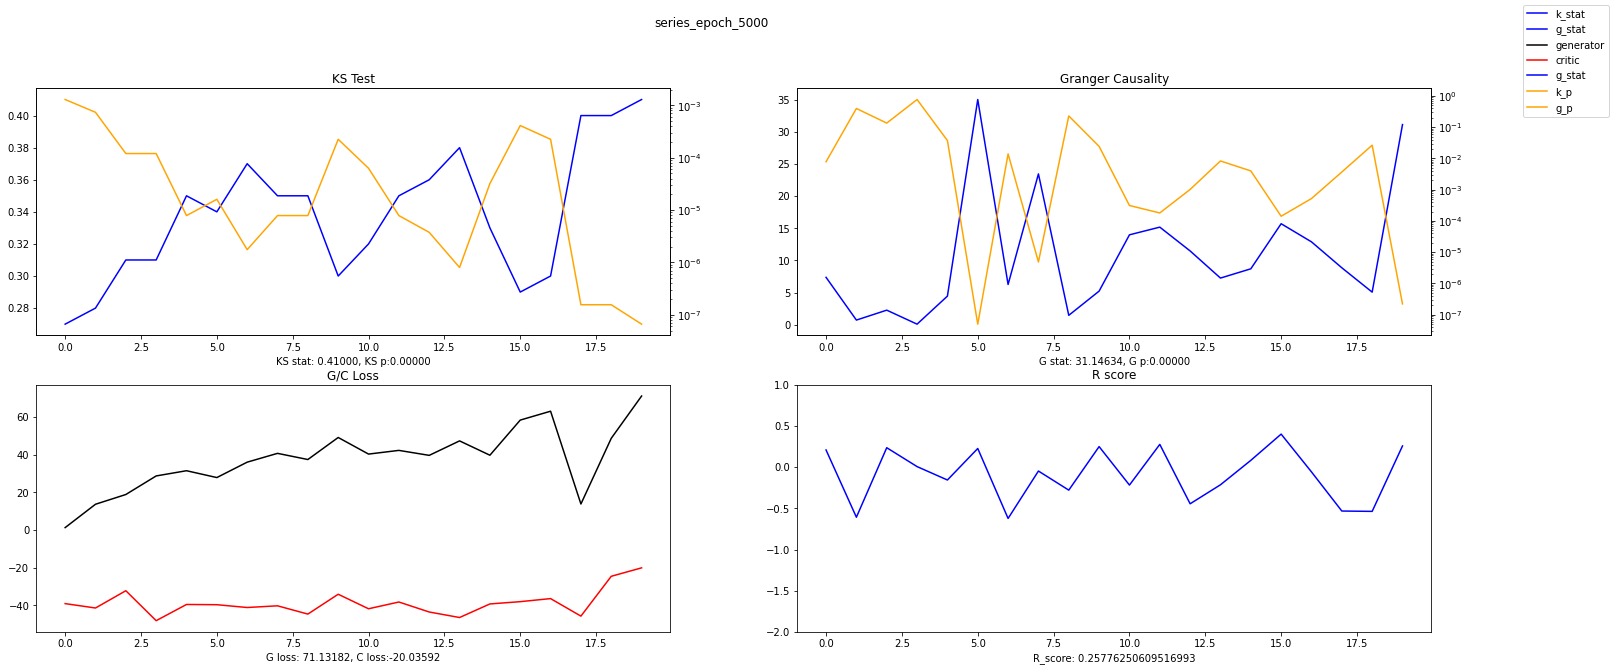

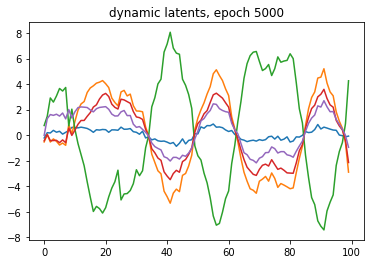

 52%|████████████████████████████████████████▍                                    | 5250/10000 [53:16<44:10,  1.79it/s]

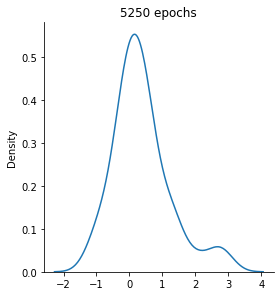

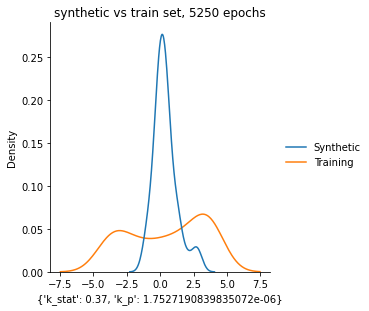

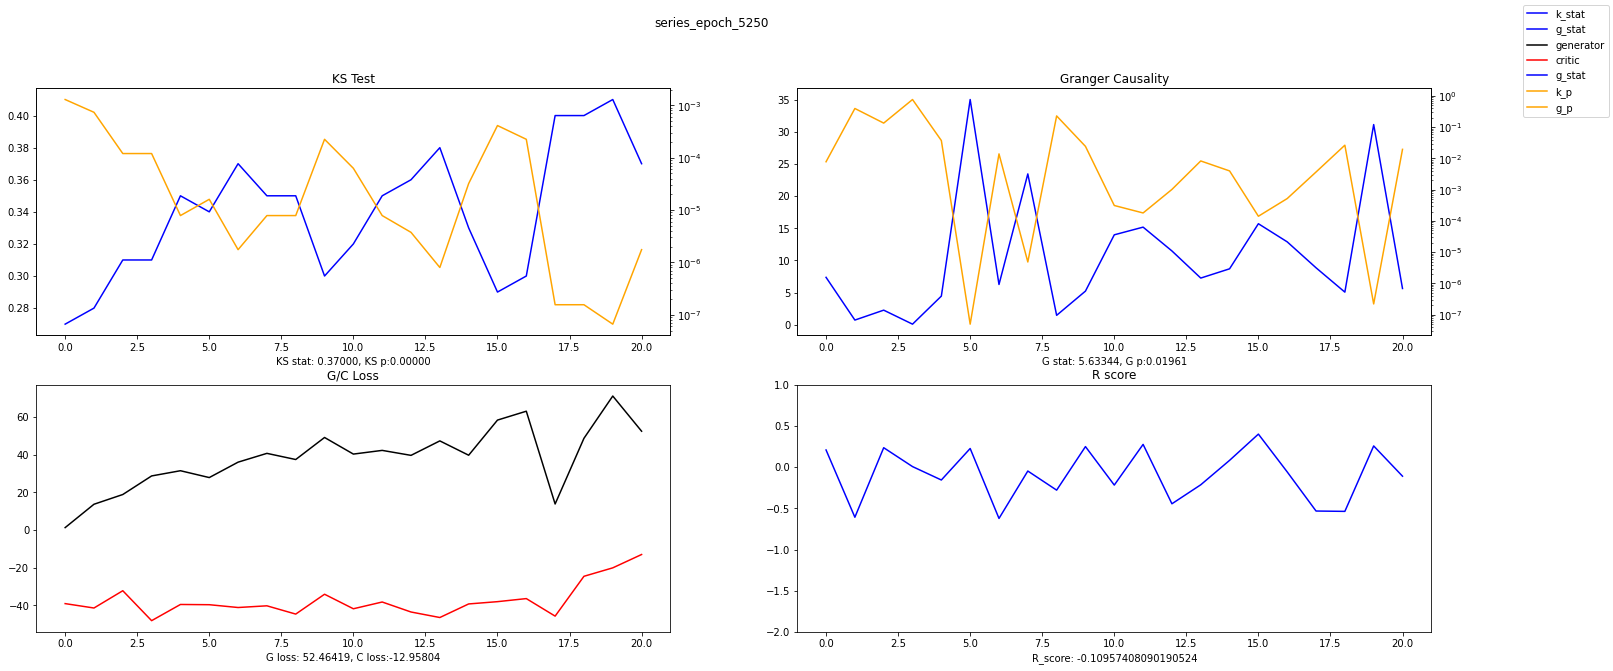

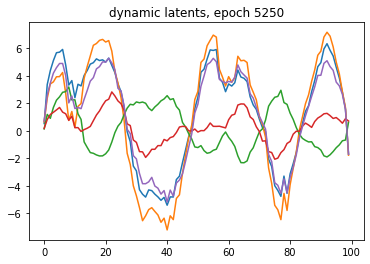

 55%|██████████████████████████████████████████▎                                  | 5500/10000 [55:37<41:33,  1.80it/s]

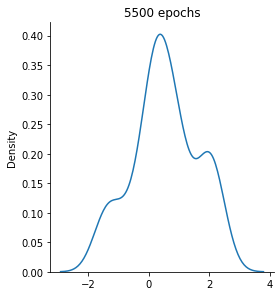

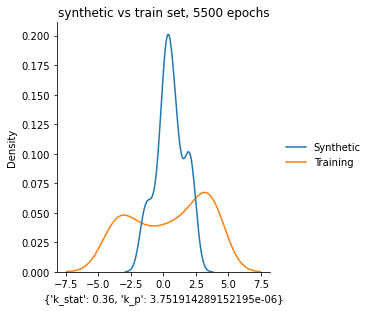

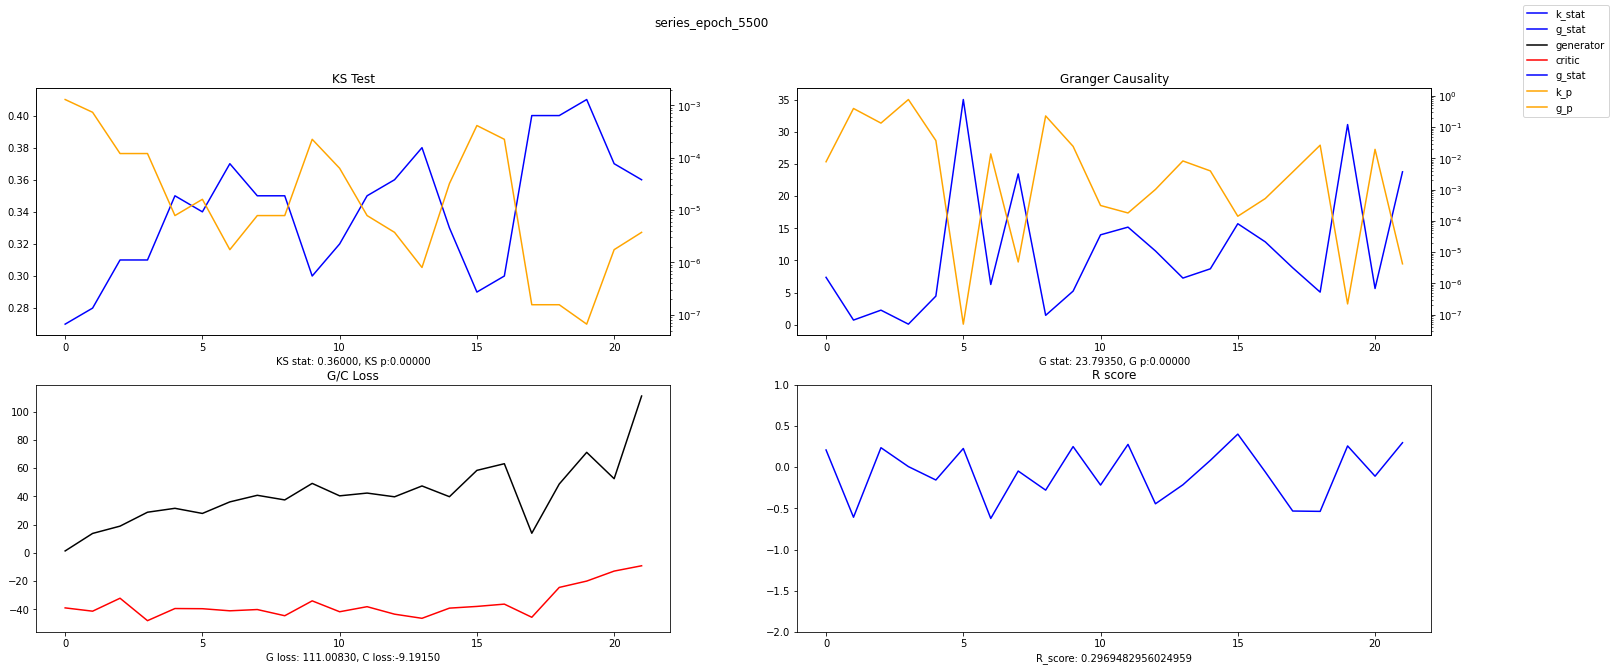

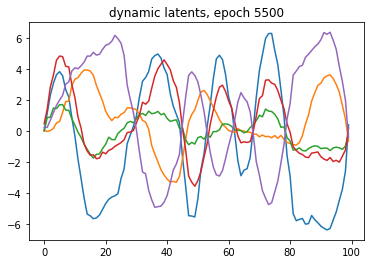

 57%|████████████████████████████████████████████▎                                | 5750/10000 [57:57<39:05,  1.81it/s]

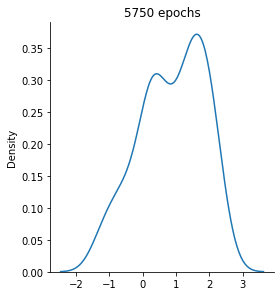

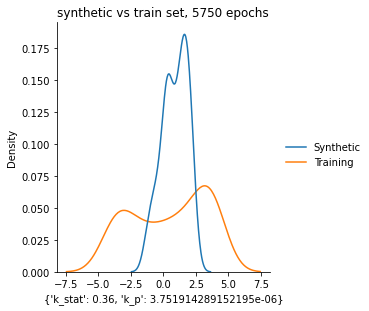

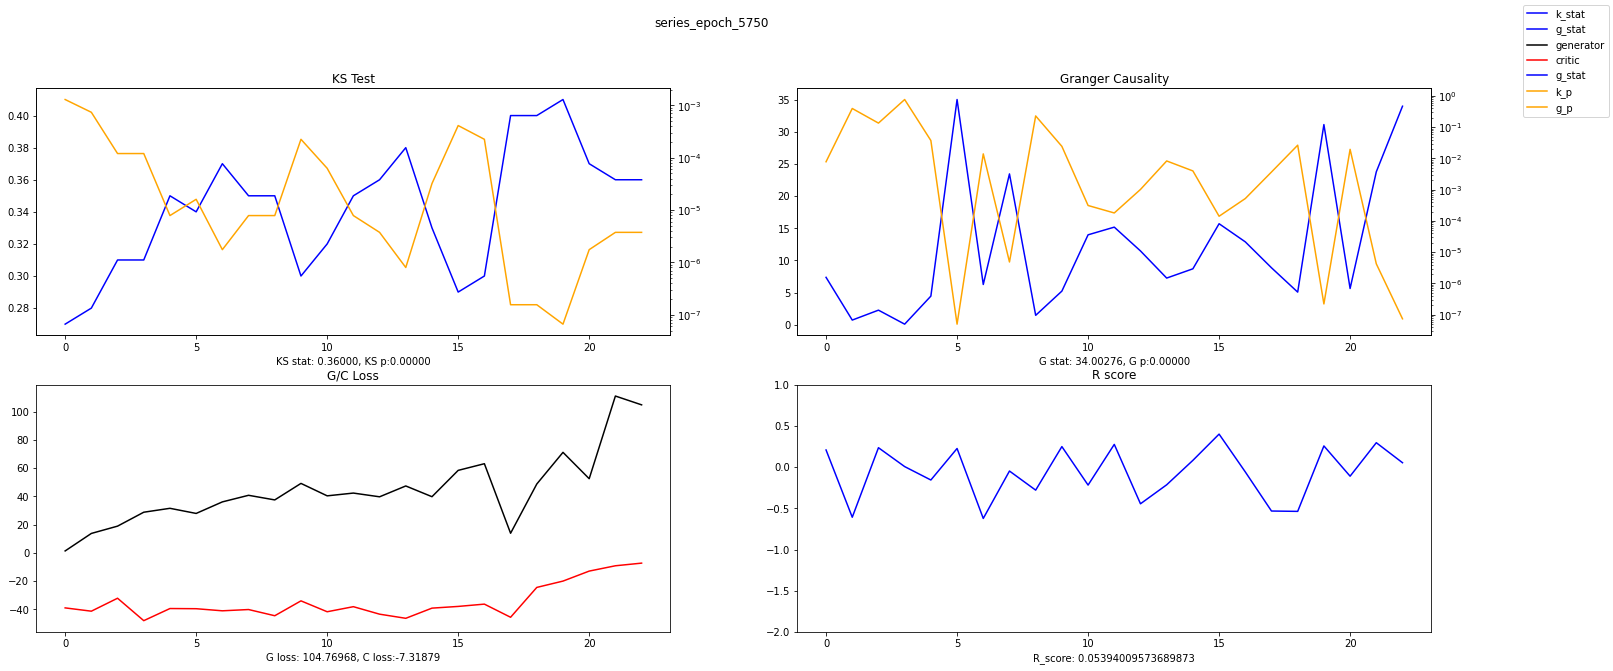

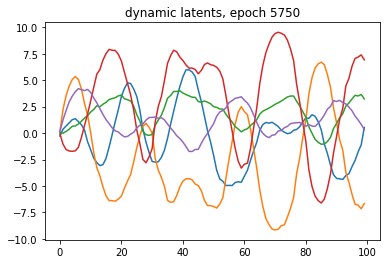

 60%|█████████████████████████████████████████████                              | 6000/10000 [1:00:19<37:33,  1.78it/s]

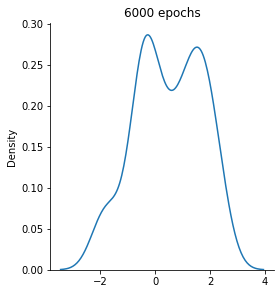

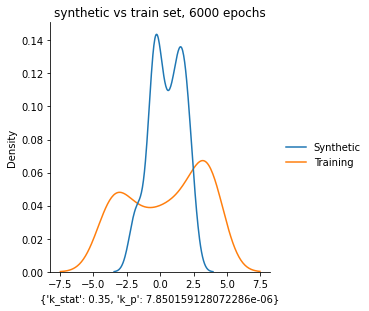

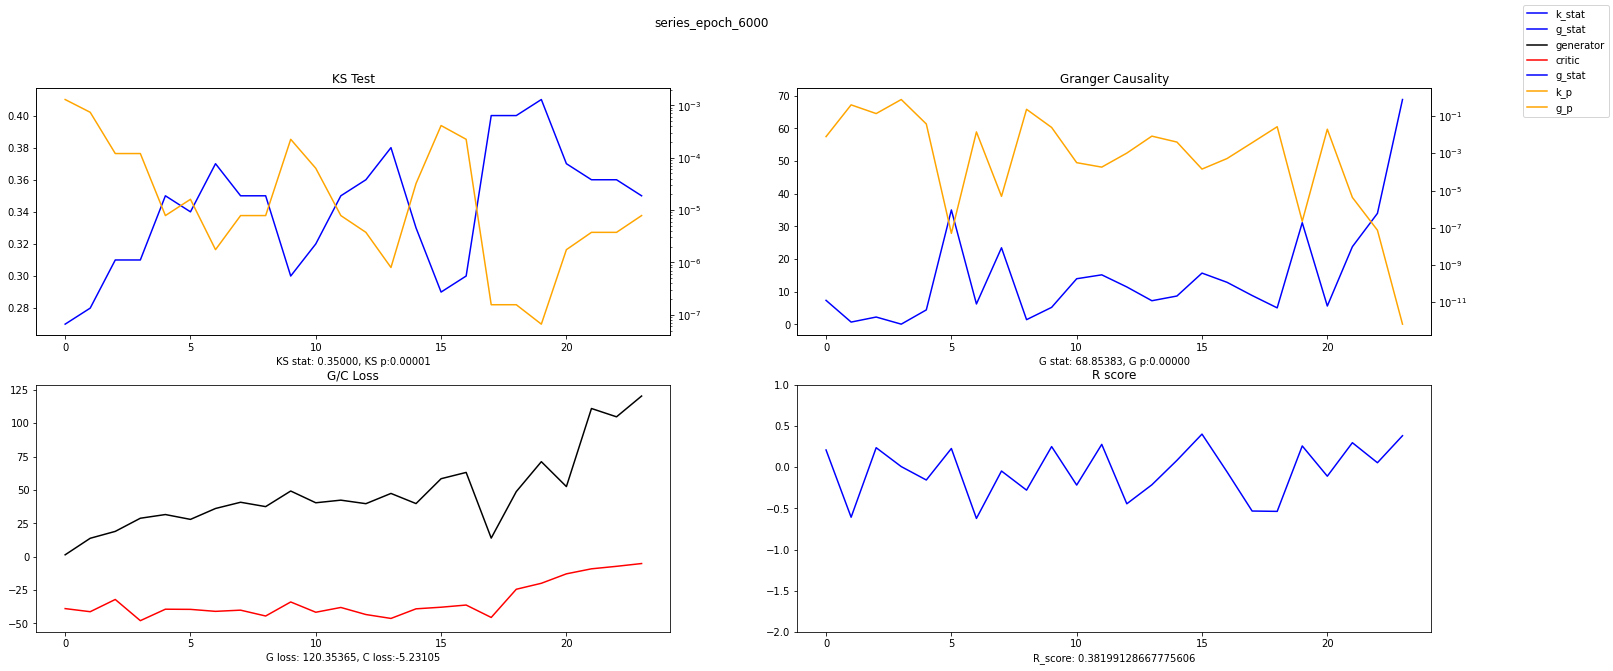

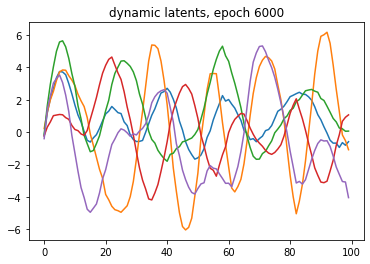

 62%|██████████████████████████████████████████████▉                            | 6250/10000 [1:02:39<34:23,  1.82it/s]

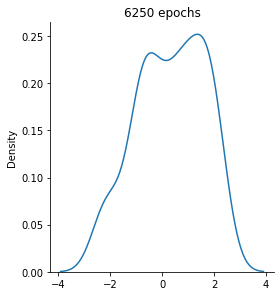

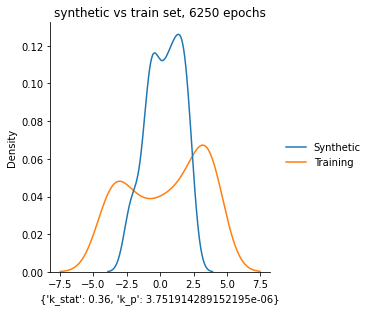

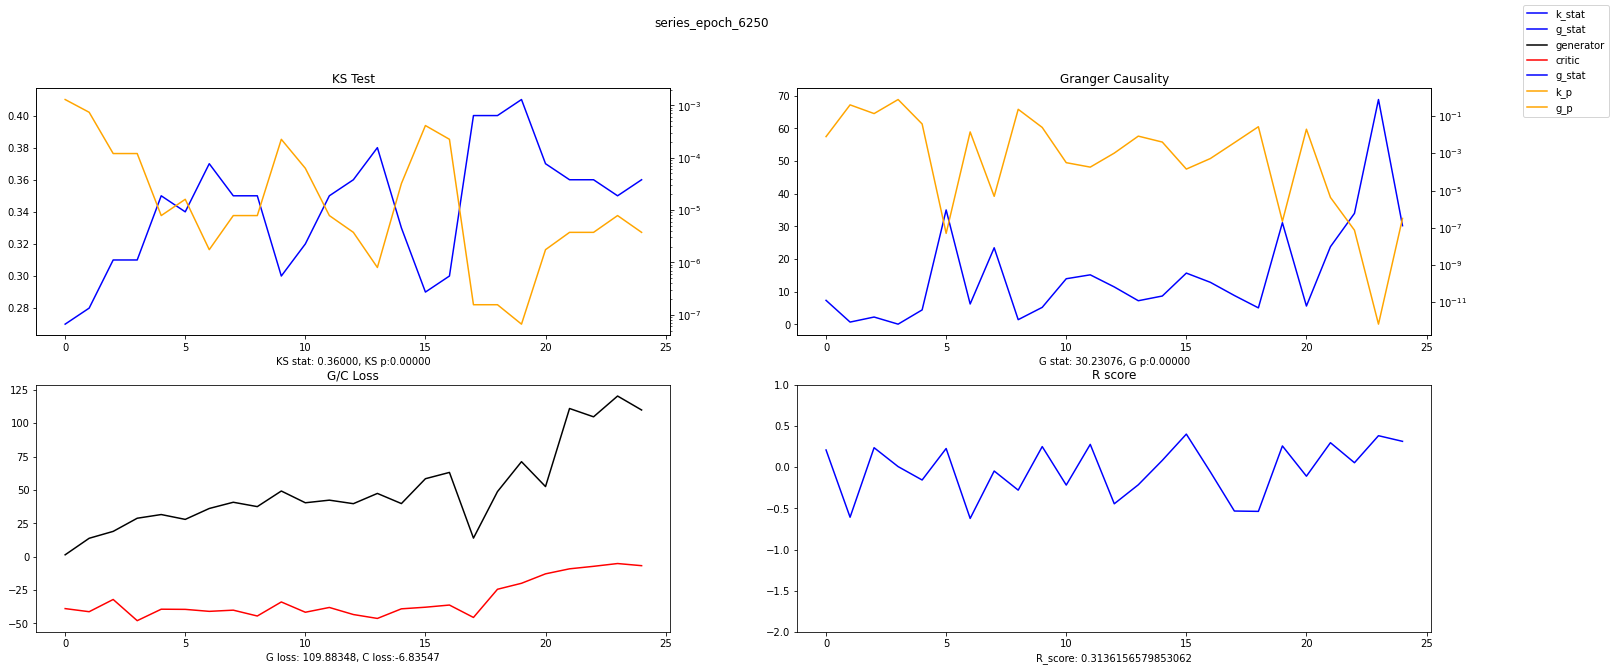

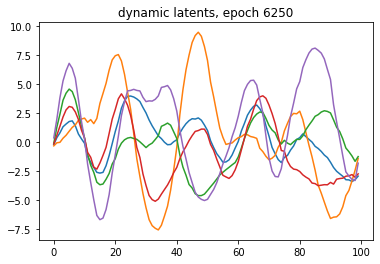

 65%|████████████████████████████████████████████████▊                          | 6500/10000 [1:05:00<32:27,  1.80it/s]

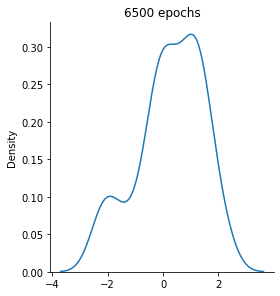

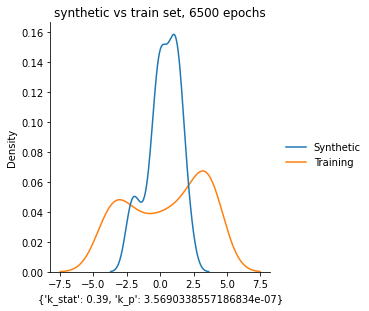

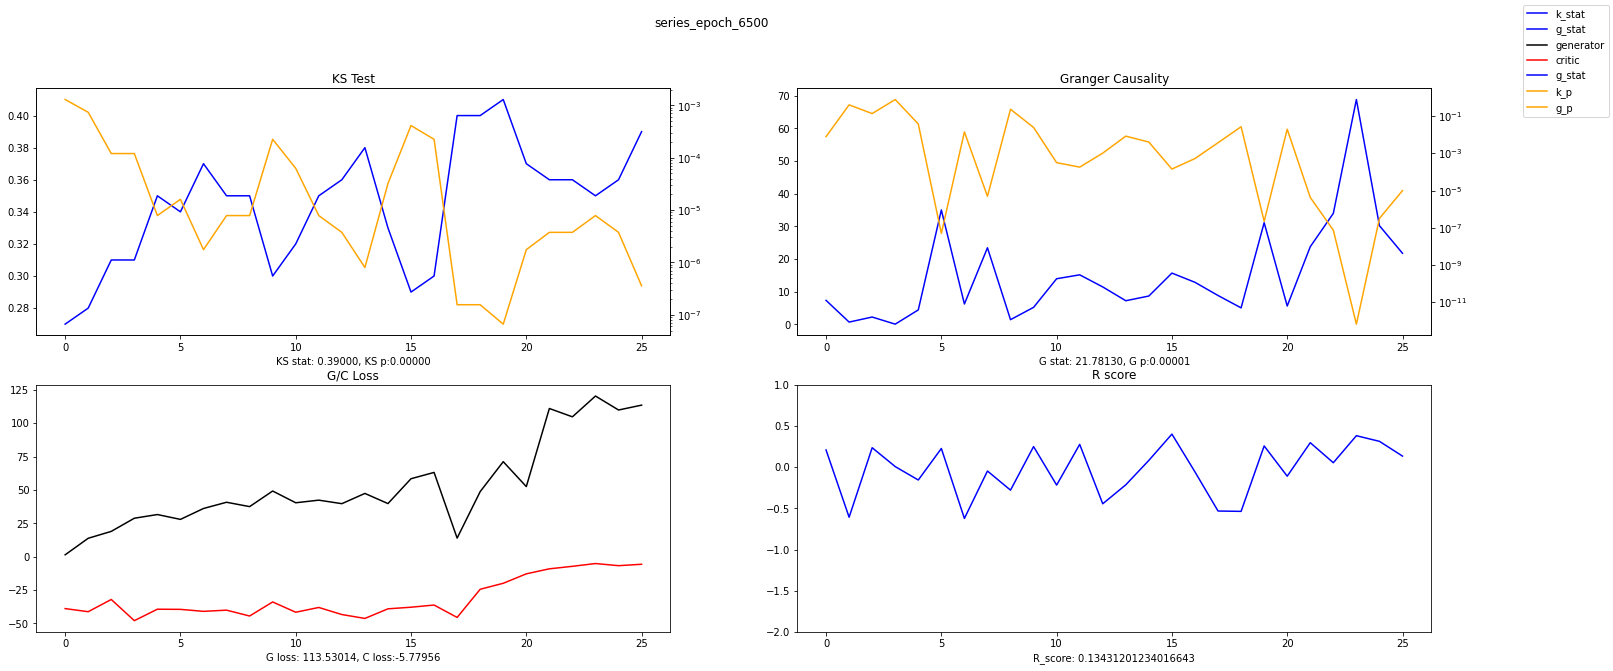

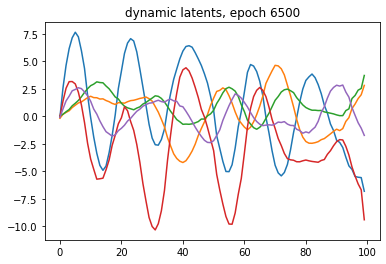

 68%|██████████████████████████████████████████████████▋                        | 6750/10000 [1:07:21<29:56,  1.81it/s]

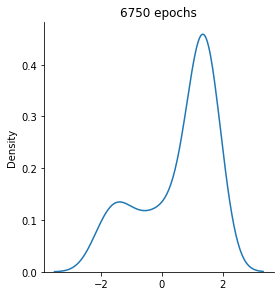

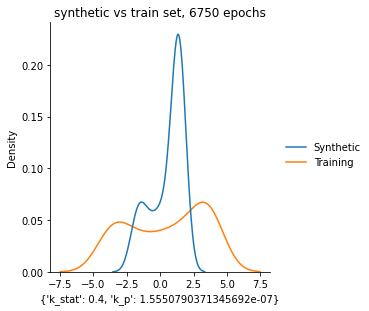

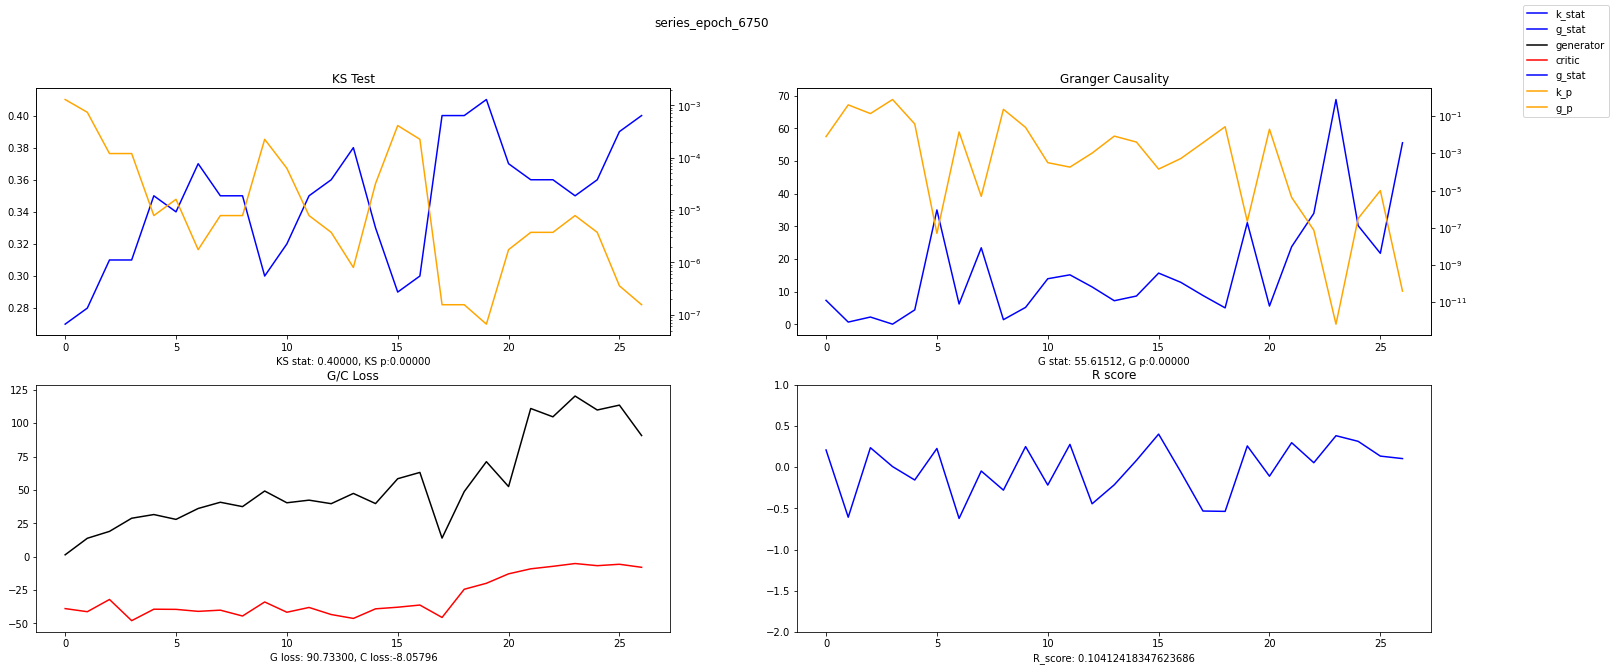

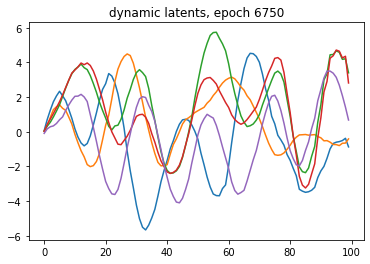

 70%|████████████████████████████████████████████████████▌                      | 7000/10000 [1:09:45<29:26,  1.70it/s]

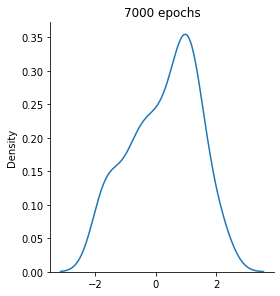

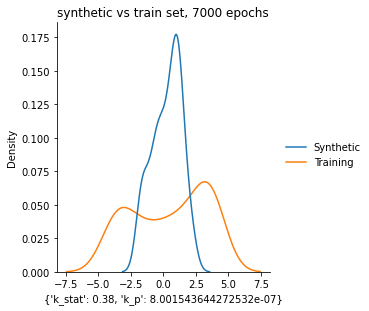

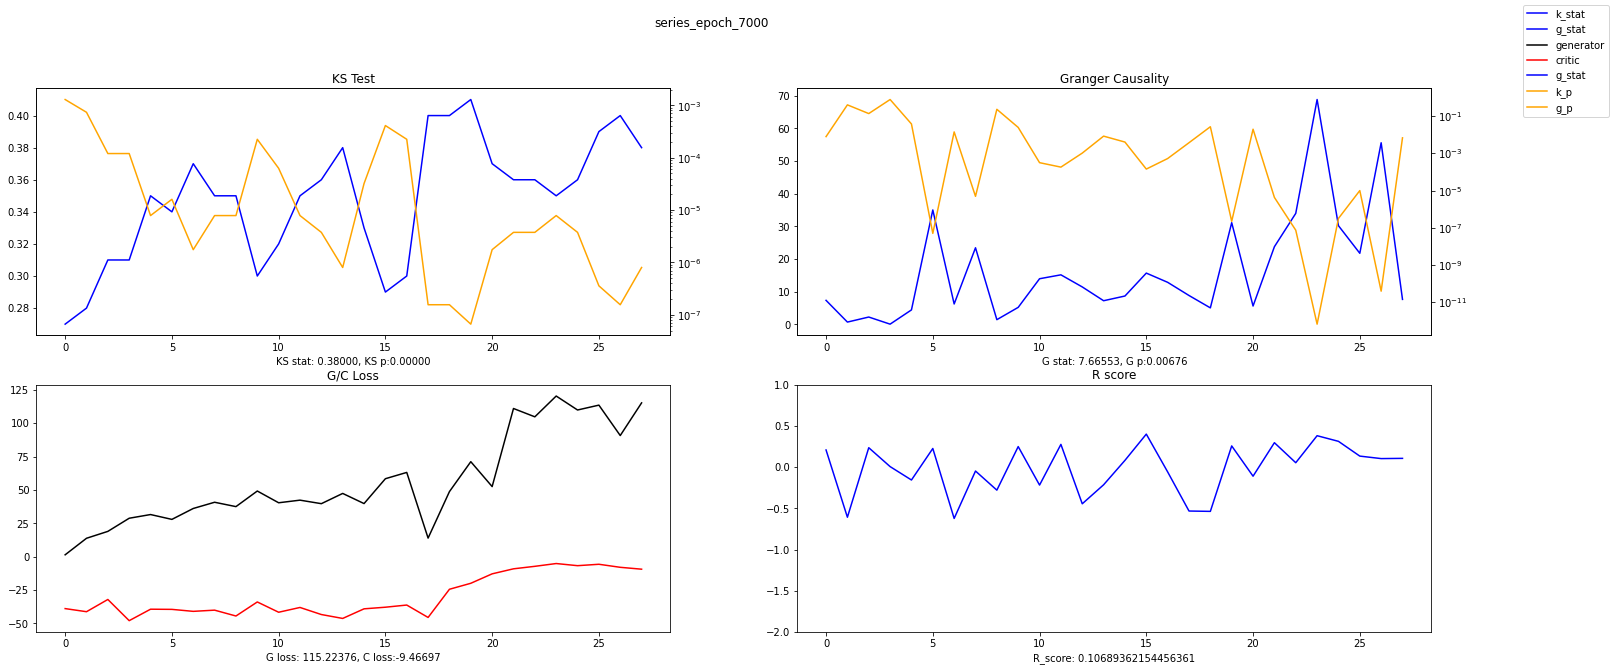

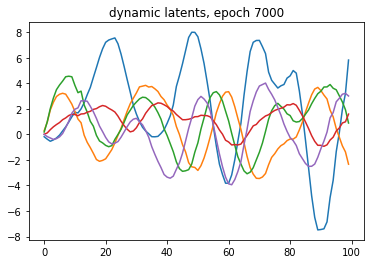

 70%|████████████████████████████████████████████████████▊                      | 7046/10000 [1:10:14<28:47,  1.71it/s]

In [ ]:
args = {}
args['dataset'] = 'sines' #sines, arma, diy_sines
args['log_name'] = 'disect'+'_{:.6f}'.format(time.time())
args['epochs'] = 10000 #15000
args['lookback'] = 1
args['batches'] = 16
args['checkpoint_path'] = None
args['store_every'] = 500
args['print_every'] = 250
args['sample_count'] = 5

# Create Dataloader
if args['dataset'] == 'sines':
    dataset = Sines(frequency_range=[0, 2 * pi], amplitude_range=[0, 2 * pi], seed=42, n_series=200)
elif args['dataset'] == 'diy':
    dataset = Load('train_sin25_100', 1)
else:
    dataset = ARMA((0.7, ), (0.2, ))
    
# Instantiate Generator and Critic + initialize weights
g = Generator(input_size=dataset.dataset.shape[1], output_size=dataset.dataset.shape[1])

g_opt = torch.optim.RMSprop(g.parameters(), lr=0.00005)#torch.optim.Adam(g.parameters(), lr=0.00005)
d = Critic(features=dataset.dataset.shape[0])

d_opt = torch.optim.RMSprop(d.parameters(), lr=0.00005)



dataloader = DataLoader(dataset, batch_size=args['batches'])
plt.plot(dataset.dataset[0])
plt.title('input: dataset[0]')
plt.show()
# Instantiate Trainer
trainer = Trainer(g, d, g_opt, d_opt, dataset, print_every=args['print_every'], sample_count=args['sample_count'])
# Train model
print('Training is about to start...')
# Instantiate Tensorboard writer
tb_logdir = os.path.join('..', 'tensorboard', args['log_name'])

print('data', dataset.dataset.shape)
trainer.train(dataloader, epochs=args['epochs'], plot_training_samples=True, checkpoint=args['checkpoint_path'])

In [ ]:
trainer.validate(10000, (200,100))